In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import elephant
import quantities as pq
import neo
import sys
plt.rcParams['figure.figsize'] = (14, 10)
import scipy.stats as stats
import itertools
import random

# Continuous version of KL divergence

We want to explore the continuous version of KL divergence and try to understand how it behaves. Will do this by generating gauss distributed data, using the same means and standard deviations as our CV distributions have. First get the code for calculating the continuous KL divs.

In [2]:
def ecdf(x,tot_min,tot_max):
    x = np.sort(list(x)+[tot_min,tot_max])
    u, c = np.unique(x, return_counts=True)
    n = len(x)
    y = (np.cumsum(c) - 0.5)/n
    def interpolate_(x_):
        yinterp = np.interp(x_, u, y, left=tot_min, right=tot_max)
        return yinterp
    return interpolate_

def cumulative_kl(x,y,fraction=0.5): 
    dx = np.diff(np.sort(np.unique(x)))
    dy = np.diff(np.sort(np.unique(y)))
    ex = np.min(dx)
    ey = np.min(dy)
    e = np.min([ex,ey])*fraction
    n = len(x)
    # total max
    max_x = max(x)
    max_y = max(y)
    tot_max = max(max_x,max_y)
    # total min
    min_x = min(x)
    min_y = min(y)
    tot_min = min(min_x, min_y)
    # send tot_max and tot_min to interpolation limits
    P = ecdf(x,tot_min,tot_max)
    Q = ecdf(y,tot_min,tot_max)
    
    # machine epsilon
    machine_eps = np.finfo('float').eps
    summ = 0
    for i in range(0,len(x)):
        if(abs(Q(x[i])-Q(x[i]-e))>3*machine_eps):
            summ += np.log((P(x[i]) - P(x[i]-e))/(Q(x[i]) - Q(x[i]-e)))
    # 1/n*summ - 1 converges to KL divergence    
    KL = (1./n)*summ - 1
    #KL = (1./n)*np.sum(np.log((P(x) - P(x-e))/(Q(x) - Q(x-e)))) - 1
    return KL

Now retrieve the dataframe and calculate the mean and standard deviations of the CV distributions of the droop model with resolution 1/2.

In [3]:
df = pd.read_pickle('structured_df.pkl')

In [14]:
m_1 = np.mean(df.loc['droop',2]['CV'][1].values)
m_2 = np.mean(df.loc['droop',2]['CV'][2].values)
m_3 = np.mean(df.loc['droop',2]['CV'][3].values)
m_4 = np.mean(df.loc['droop',2]['CV'][4].values)
m_5 = np.mean(df.loc['droop',2]['CV'][5].values)
m_6 = np.mean(df.loc['droop',2]['CV'][6].values)
m_7 = np.mean(df.loc['droop',2]['CV'][7].values)
m_8 = np.mean(df.loc['droop',2]['CV'][8].values)
m_9 = np.mean(df.loc['droop',2]['CV'][9].values)
m_10 = np.mean(df.loc['droop',2]['CV'][10].values)


s_1 = np.std(df.loc['droop',2]['CV'][1].values)
s_2 = np.std(df.loc['droop',2]['CV'][2].values)
s_3 = np.std(df.loc['droop',2]['CV'][3].values)
s_4 = np.std(df.loc['droop',2]['CV'][4].values)
s_5 = np.std(df.loc['droop',2]['CV'][5].values)
s_6 = np.std(df.loc['droop',2]['CV'][6].values)
s_7 = np.std(df.loc['droop',2]['CV'][7].values)
s_8 = np.std(df.loc['droop',2]['CV'][8].values)
s_9 = np.std(df.loc['droop',2]['CV'][9].values)
s_10 = np.std(df.loc['droop',2]['CV'][10].values)

Generate the Gauss data.

In [24]:
x_1 = np.random.normal(m_1, s_1, 10000)
x_2 = np.random.normal(m_2, s_2, 10000)
x_3 = np.random.normal(m_3, s_3, 10000)
x_4 = np.random.normal(m_4, s_4, 10000)
x_5 = np.random.normal(m_5, s_5, 10000)
x_6 = np.random.normal(m_6, s_6, 10000)
x_7 = np.random.normal(m_7, s_7, 10000)
x_8 = np.random.normal(m_8, s_8, 10000)
x_9 = np.random.normal(m_9, s_9, 10000)
x_10 = np.random.normal(m_10, s_10, 10000)

x = [x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10]

Calculate the KL divergence between each possible pair of normal distributions.

In [28]:
divs_cont_droop_2 = []
for i in range(0,10):
        for j in range(0,i):
            kl = cumulative_kl(x[i],x[j])
            divs_cont_droop_2.append(kl)

This will only give us one graph, lets do this for all resolutions of droop model. This way we can examine what behaviour to expect from distributions from the same model.

In [29]:
m_1 = np.mean(df.loc['droop',4]['CV'][1].values)
m_2 = np.mean(df.loc['droop',4]['CV'][2].values)
m_3 = np.mean(df.loc['droop',4]['CV'][3].values)
m_4 = np.mean(df.loc['droop',4]['CV'][4].values)
m_5 = np.mean(df.loc['droop',4]['CV'][5].values)
m_6 = np.mean(df.loc['droop',4]['CV'][6].values)
m_7 = np.mean(df.loc['droop',4]['CV'][7].values)
m_8 = np.mean(df.loc['droop',4]['CV'][8].values)
m_9 = np.mean(df.loc['droop',4]['CV'][9].values)
m_10 = np.mean(df.loc['droop',4]['CV'][10].values)


s_1 = np.std(df.loc['droop',4]['CV'][1].values)
s_2 = np.std(df.loc['droop',4]['CV'][2].values)
s_3 = np.std(df.loc['droop',4]['CV'][3].values)
s_4 = np.std(df.loc['droop',4]['CV'][4].values)
s_5 = np.std(df.loc['droop',4]['CV'][5].values)
s_6 = np.std(df.loc['droop',4]['CV'][6].values)
s_7 = np.std(df.loc['droop',4]['CV'][7].values)
s_8 = np.std(df.loc['droop',4]['CV'][8].values)
s_9 = np.std(df.loc['droop',4]['CV'][9].values)
s_10 = np.std(df.loc['droop',4]['CV'][10].values)

In [30]:
y_1 = np.random.normal(m_1, s_1, 10000)
y_2 = np.random.normal(m_2, s_2, 10000)
y_3 = np.random.normal(m_3, s_3, 10000)
y_4 = np.random.normal(m_4, s_4, 10000)
y_5 = np.random.normal(m_5, s_5, 10000)
y_6 = np.random.normal(m_6, s_6, 10000)
y_7 = np.random.normal(m_7, s_7, 10000)
y_8 = np.random.normal(m_8, s_8, 10000)
y_9 = np.random.normal(m_9, s_9, 10000)
y_10 = np.random.normal(m_10, s_10, 10000)

y = [y_1,y_2,y_3,y_4,y_5,y_6,y_7,y_8,y_9,y_10]

In [31]:
m_1 = np.mean(df.loc['droop',8]['CV'][1].values)
m_2 = np.mean(df.loc['droop',8]['CV'][2].values)
m_3 = np.mean(df.loc['droop',8]['CV'][3].values)
m_4 = np.mean(df.loc['droop',8]['CV'][4].values)
m_5 = np.mean(df.loc['droop',8]['CV'][5].values)
m_6 = np.mean(df.loc['droop',8]['CV'][6].values)
m_7 = np.mean(df.loc['droop',8]['CV'][7].values)
m_8 = np.mean(df.loc['droop',8]['CV'][8].values)
m_9 = np.mean(df.loc['droop',8]['CV'][9].values)
m_10 = np.mean(df.loc['droop',8]['CV'][10].values)


s_1 = np.std(df.loc['droop',8]['CV'][1].values)
s_2 = np.std(df.loc['droop',8]['CV'][2].values)
s_3 = np.std(df.loc['droop',8]['CV'][3].values)
s_4 = np.std(df.loc['droop',8]['CV'][4].values)
s_5 = np.std(df.loc['droop',8]['CV'][5].values)
s_6 = np.std(df.loc['droop',8]['CV'][6].values)
s_7 = np.std(df.loc['droop',8]['CV'][7].values)
s_8 = np.std(df.loc['droop',8]['CV'][8].values)
s_9 = np.std(df.loc['droop',8]['CV'][9].values)
s_10 = np.std(df.loc['droop',8]['CV'][10].values)

In [32]:
z_1 = np.random.normal(m_1, s_1, 10000)
z_2 = np.random.normal(m_2, s_2, 10000)
z_3 = np.random.normal(m_3, s_3, 10000)
z_4 = np.random.normal(m_4, s_4, 10000)
z_5 = np.random.normal(m_5, s_5, 10000)
z_6 = np.random.normal(m_6, s_6, 10000)
z_7 = np.random.normal(m_7, s_7, 10000)
z_8 = np.random.normal(m_8, s_8, 10000)
z_9 = np.random.normal(m_9, s_9, 10000)
z_10 = np.random.normal(m_10, s_10, 10000)

z = [z_1,z_2,z_3,z_4,z_5,z_6,z_7,z_8,z_9,z_10]

In [33]:
m_1 = np.mean(df.loc['droop',16]['CV'][1].values)
m_2 = np.mean(df.loc['droop',16]['CV'][2].values)
m_3 = np.mean(df.loc['droop',16]['CV'][3].values)
m_4 = np.mean(df.loc['droop',16]['CV'][4].values)
m_5 = np.mean(df.loc['droop',16]['CV'][5].values)
m_6 = np.mean(df.loc['droop',16]['CV'][6].values)
m_7 = np.mean(df.loc['droop',16]['CV'][7].values)
m_8 = np.mean(df.loc['droop',16]['CV'][8].values)
m_9 = np.mean(df.loc['droop',16]['CV'][9].values)
m_10 = np.mean(df.loc['droop',16]['CV'][10].values)


s_1 = np.std(df.loc['droop',16]['CV'][1].values)
s_2 = np.std(df.loc['droop',16]['CV'][2].values)
s_3 = np.std(df.loc['droop',16]['CV'][3].values)
s_4 = np.std(df.loc['droop',16]['CV'][4].values)
s_5 = np.std(df.loc['droop',16]['CV'][5].values)
s_6 = np.std(df.loc['droop',16]['CV'][6].values)
s_7 = np.std(df.loc['droop',16]['CV'][7].values)
s_8 = np.std(df.loc['droop',16]['CV'][8].values)
s_9 = np.std(df.loc['droop',16]['CV'][9].values)
s_10 = np.std(df.loc['droop',16]['CV'][10].values)

In [34]:
a_1 = np.random.normal(m_1, s_1, 10000)
a_2 = np.random.normal(m_2, s_2, 10000)
a_3 = np.random.normal(m_3, s_3, 10000)
a_4 = np.random.normal(m_4, s_4, 10000)
a_5 = np.random.normal(m_5, s_5, 10000)
a_6 = np.random.normal(m_6, s_6, 10000)
a_7 = np.random.normal(m_7, s_7, 10000)
a_8 = np.random.normal(m_8, s_8, 10000)
a_9 = np.random.normal(m_9, s_9, 10000)
a_10 = np.random.normal(m_10, s_10, 10000)

a = [a_1,a_2,a_3,a_4,a_5,a_6,a_7,a_8,a_9,a_10]

In [35]:
m_1 = np.mean(df.loc['droop',32]['CV'][1].values)
m_2 = np.mean(df.loc['droop',32]['CV'][2].values)
m_3 = np.mean(df.loc['droop',32]['CV'][3].values)
m_4 = np.mean(df.loc['droop',32]['CV'][4].values)
m_5 = np.mean(df.loc['droop',32]['CV'][5].values)
m_6 = np.mean(df.loc['droop',32]['CV'][6].values)
m_7 = np.mean(df.loc['droop',32]['CV'][7].values)
m_8 = np.mean(df.loc['droop',32]['CV'][8].values)
m_9 = np.mean(df.loc['droop',32]['CV'][9].values)
m_10 = np.mean(df.loc['droop',32]['CV'][10].values)


s_1 = np.std(df.loc['droop',32]['CV'][1].values)
s_2 = np.std(df.loc['droop',32]['CV'][2].values)
s_3 = np.std(df.loc['droop',32]['CV'][3].values)
s_4 = np.std(df.loc['droop',32]['CV'][4].values)
s_5 = np.std(df.loc['droop',32]['CV'][5].values)
s_6 = np.std(df.loc['droop',32]['CV'][6].values)
s_7 = np.std(df.loc['droop',32]['CV'][7].values)
s_8 = np.std(df.loc['droop',32]['CV'][8].values)
s_9 = np.std(df.loc['droop',32]['CV'][9].values)
s_10 = np.std(df.loc['droop',32]['CV'][10].values)

In [36]:
b_1 = np.random.normal(m_1, s_1, 10000)
b_2 = np.random.normal(m_2, s_2, 10000)
b_3 = np.random.normal(m_3, s_3, 10000)
b_4 = np.random.normal(m_4, s_4, 10000)
b_5 = np.random.normal(m_5, s_5, 10000)
b_6 = np.random.normal(m_6, s_6, 10000)
b_7 = np.random.normal(m_7, s_7, 10000)
b_8 = np.random.normal(m_8, s_8, 10000)
b_9 = np.random.normal(m_9, s_9, 10000)
b_10 = np.random.normal(m_10, s_10, 10000)

b = [b_1,b_2,b_3,b_4,b_5,b_6,b_7,b_8,b_9,b_10]

In [37]:
m_1 = np.mean(df.loc['droop',64]['CV'][1].values)
m_2 = np.mean(df.loc['droop',64]['CV'][2].values)
m_3 = np.mean(df.loc['droop',64]['CV'][3].values)
m_4 = np.mean(df.loc['droop',64]['CV'][4].values)
m_5 = np.mean(df.loc['droop',64]['CV'][5].values)
m_6 = np.mean(df.loc['droop',64]['CV'][6].values)
m_7 = np.mean(df.loc['droop',64]['CV'][7].values)
m_8 = np.mean(df.loc['droop',64]['CV'][8].values)
m_9 = np.mean(df.loc['droop',64]['CV'][9].values)
m_10 = np.mean(df.loc['droop',64]['CV'][10].values)


s_1 = np.std(df.loc['droop',64]['CV'][1].values)
s_2 = np.std(df.loc['droop',64]['CV'][2].values)
s_3 = np.std(df.loc['droop',64]['CV'][3].values)
s_4 = np.std(df.loc['droop',64]['CV'][4].values)
s_5 = np.std(df.loc['droop',64]['CV'][5].values)
s_6 = np.std(df.loc['droop',64]['CV'][6].values)
s_7 = np.std(df.loc['droop',64]['CV'][7].values)
s_8 = np.std(df.loc['droop',64]['CV'][8].values)
s_9 = np.std(df.loc['droop',64]['CV'][9].values)
s_10 = np.std(df.loc['droop',64]['CV'][10].values)

In [38]:
c_1 = np.random.normal(m_1, s_1, 10000)
c_2 = np.random.normal(m_2, s_2, 10000)
c_3 = np.random.normal(m_3, s_3, 10000)
c_4 = np.random.normal(m_4, s_4, 10000)
c_5 = np.random.normal(m_5, s_5, 10000)
c_6 = np.random.normal(m_6, s_6, 10000)
c_7 = np.random.normal(m_7, s_7, 10000)
c_8 = np.random.normal(m_8, s_8, 10000)
c_9 = np.random.normal(m_9, s_9, 10000)
c_10 = np.random.normal(m_10, s_10, 10000)

c = [c_1,c_2,c_3,c_4,c_5,c_6,c_7,c_8,c_9,c_10]

In [39]:
m_1 = np.mean(df.loc['droop',128]['CV'][1].values)
m_2 = np.mean(df.loc['droop',128]['CV'][2].values)
m_3 = np.mean(df.loc['droop',128]['CV'][3].values)
m_4 = np.mean(df.loc['droop',128]['CV'][4].values)
m_5 = np.mean(df.loc['droop',128]['CV'][5].values)
m_6 = np.mean(df.loc['droop',128]['CV'][6].values)
m_7 = np.mean(df.loc['droop',128]['CV'][7].values)
m_8 = np.mean(df.loc['droop',128]['CV'][8].values)
m_9 = np.mean(df.loc['droop',128]['CV'][9].values)
m_10 = np.mean(df.loc['droop',128]['CV'][10].values)


s_1 = np.std(df.loc['droop',128]['CV'][1].values)
s_2 = np.std(df.loc['droop',128]['CV'][2].values)
s_3 = np.std(df.loc['droop',128]['CV'][3].values)
s_4 = np.std(df.loc['droop',128]['CV'][4].values)
s_5 = np.std(df.loc['droop',128]['CV'][5].values)
s_6 = np.std(df.loc['droop',128]['CV'][6].values)
s_7 = np.std(df.loc['droop',128]['CV'][7].values)
s_8 = np.std(df.loc['droop',128]['CV'][8].values)
s_9 = np.std(df.loc['droop',128]['CV'][9].values)
s_10 = np.std(df.loc['droop',128]['CV'][10].values)

In [40]:
d_1 = np.random.normal(m_1, s_1, 10000)
d_2 = np.random.normal(m_2, s_2, 10000)
d_3 = np.random.normal(m_3, s_3, 10000)
d_4 = np.random.normal(m_4, s_4, 10000)
d_5 = np.random.normal(m_5, s_5, 10000)
d_6 = np.random.normal(m_6, s_6, 10000)
d_7 = np.random.normal(m_7, s_7, 10000)
d_8 = np.random.normal(m_8, s_8, 10000)
d_9 = np.random.normal(m_9, s_9, 10000)
d_10 = np.random.normal(m_10, s_10, 10000)

d = [d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10]

In [41]:
m_1 = np.mean(df.loc['droop',256]['CV'][1].values)
m_2 = np.mean(df.loc['droop',256]['CV'][2].values)
m_3 = np.mean(df.loc['droop',256]['CV'][3].values)
m_4 = np.mean(df.loc['droop',256]['CV'][4].values)
m_5 = np.mean(df.loc['droop',256]['CV'][5].values)
m_6 = np.mean(df.loc['droop',256]['CV'][6].values)
m_7 = np.mean(df.loc['droop',256]['CV'][7].values)
m_8 = np.mean(df.loc['droop',256]['CV'][8].values)
m_9 = np.mean(df.loc['droop',256]['CV'][9].values)
m_10 = np.mean(df.loc['droop',256]['CV'][10].values)


s_1 = np.std(df.loc['droop',256]['CV'][1].values)
s_2 = np.std(df.loc['droop',256]['CV'][2].values)
s_3 = np.std(df.loc['droop',256]['CV'][3].values)
s_4 = np.std(df.loc['droop',256]['CV'][4].values)
s_5 = np.std(df.loc['droop',256]['CV'][5].values)
s_6 = np.std(df.loc['droop',256]['CV'][6].values)
s_7 = np.std(df.loc['droop',256]['CV'][7].values)
s_8 = np.std(df.loc['droop',256]['CV'][8].values)
s_9 = np.std(df.loc['droop',256]['CV'][9].values)
s_10 = np.std(df.loc['droop',256]['CV'][10].values)

In [42]:
e_1 = np.random.normal(m_1, s_1, 10000)
e_2 = np.random.normal(m_2, s_2, 10000)
e_3 = np.random.normal(m_3, s_3, 10000)
e_4 = np.random.normal(m_4, s_4, 10000)
e_5 = np.random.normal(m_5, s_5, 10000)
e_6 = np.random.normal(m_6, s_6, 10000)
e_7 = np.random.normal(m_7, s_7, 10000)
e_8 = np.random.normal(m_8, s_8, 10000)
e_9 = np.random.normal(m_9, s_9, 10000)
e_10 = np.random.normal(m_10, s_10, 10000)

e = [e_1,e_2,e_3,e_4,e_5,e_6,e_7,e_8,e_9,e_10]

Now calculate the KL divs.

In [96]:
divs_cont_droop_2 = []
for i in range(0,10):
        for j in range(0,i):
            kl = cumulative_kl(x[i],x[j])
            divs_cont_droop_2.append(kl)

In [66]:
divs_cont_droop_4 = []
for i in range(0,10):
        for j in range(0,i):
            kl = cumulative_kl(y[i],y[j])
            divs_cont_droop_4.append(kl)

In [67]:
divs_cont_droop_8 = []
for i in range(0,10):
        for j in range(0,i):
            kl = cumulative_kl(z[i],z[j])
            divs_cont_droop_8.append(kl)

In [68]:
divs_cont_droop_16 = []
for i in range(0,10):
        for j in range(0,i):
            kl = cumulative_kl(a[i],a[j])
            divs_cont_droop_16.append(kl)

In [69]:
divs_cont_droop_32 = []
for i in range(0,10):
        for j in range(0,i):
            kl = cumulative_kl(b[i],b[j])
            divs_cont_droop_32.append(kl)

In [70]:
divs_cont_droop_64 = []
for i in range(0,10):
        for j in range(0,i):
            kl = cumulative_kl(c[i],c[j])
            divs_cont_droop_64.append(kl)

In [71]:
divs_cont_droop_128 = []
for i in range(0,10):
        for j in range(0,i):
            kl = cumulative_kl(d[i],d[j])
            divs_cont_droop_128.append(kl)

In [72]:
divs_cont_droop_256 = []
for i in range(0,10):
        for j in range(0,i):
            kl = cumulative_kl(e[i],e[j])
            divs_cont_droop_256.append(kl)

Lets plot them together.

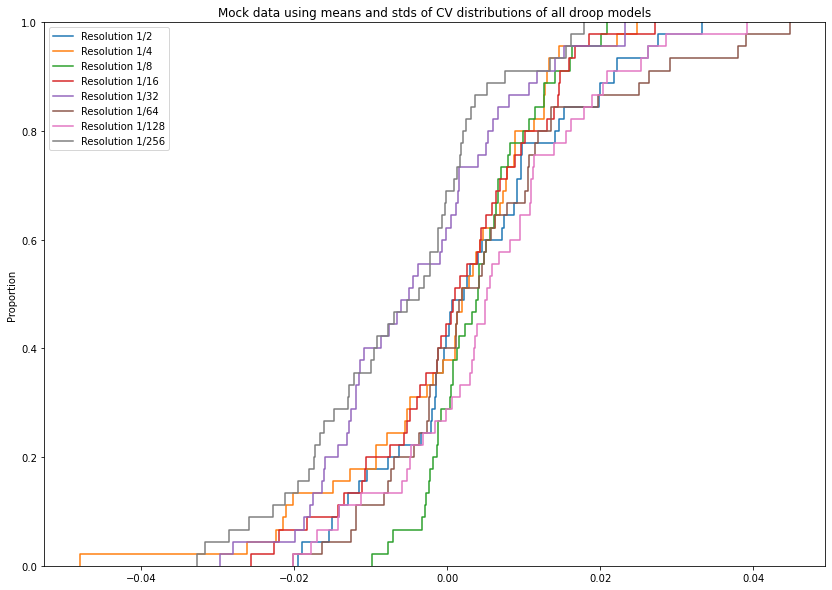

In [97]:
sns.ecdfplot(divs_cont_droop_2,label='Resolution 1/2')
sns.ecdfplot(divs_cont_droop_4,label='Resolution 1/4')
sns.ecdfplot(divs_cont_droop_8,label='Resolution 1/8')
sns.ecdfplot(divs_cont_droop_16,label='Resolution 1/16')
sns.ecdfplot(divs_cont_droop_32,label='Resolution 1/32')
sns.ecdfplot(divs_cont_droop_64,label='Resolution 1/64')
sns.ecdfplot(divs_cont_droop_128,label='Resolution 1/128')
sns.ecdfplot(divs_cont_droop_256,label='Resolution 1/256')
plt.legend();
plt.title('Mock data using means and stds of CV distributions of all droop models');

Lets do the same for the equal model.

In [74]:
m_1 = np.mean(df.loc['equal',4]['CV'][1].values)
m_2 = np.mean(df.loc['equal',4]['CV'][2].values)
m_3 = np.mean(df.loc['equal',4]['CV'][3].values)
m_4 = np.mean(df.loc['equal',4]['CV'][4].values)
m_5 = np.mean(df.loc['equal',4]['CV'][5].values)
m_6 = np.mean(df.loc['equal',4]['CV'][6].values)
m_7 = np.mean(df.loc['equal',4]['CV'][7].values)
m_8 = np.mean(df.loc['equal',4]['CV'][8].values)
m_9 = np.mean(df.loc['equal',4]['CV'][9].values)
m_10 = np.mean(df.loc['equal',4]['CV'][10].values)


s_1 = np.std(df.loc['equal',4]['CV'][1].values)
s_2 = np.std(df.loc['equal',4]['CV'][2].values)
s_3 = np.std(df.loc['equal',4]['CV'][3].values)
s_4 = np.std(df.loc['equal',4]['CV'][4].values)
s_5 = np.std(df.loc['equal',4]['CV'][5].values)
s_6 = np.std(df.loc['equal',4]['CV'][6].values)
s_7 = np.std(df.loc['equal',4]['CV'][7].values)
s_8 = np.std(df.loc['equal',4]['CV'][8].values)
s_9 = np.std(df.loc['equal',4]['CV'][9].values)
s_10 = np.std(df.loc['equal',4]['CV'][10].values)

In [75]:
y_1 = np.random.normal(m_1, s_1, 10000)
y_2 = np.random.normal(m_2, s_2, 10000)
y_3 = np.random.normal(m_3, s_3, 10000)
y_4 = np.random.normal(m_4, s_4, 10000)
y_5 = np.random.normal(m_5, s_5, 10000)
y_6 = np.random.normal(m_6, s_6, 10000)
y_7 = np.random.normal(m_7, s_7, 10000)
y_8 = np.random.normal(m_8, s_8, 10000)
y_9 = np.random.normal(m_9, s_9, 10000)
y_10 = np.random.normal(m_10, s_10, 10000)

y = [y_1,y_2,y_3,y_4,y_5,y_6,y_7,y_8,y_9,y_10]

In [76]:
m_1 = np.mean(df.loc['equal',8]['CV'][1].values)
m_2 = np.mean(df.loc['equal',8]['CV'][2].values)
m_3 = np.mean(df.loc['equal',8]['CV'][3].values)
m_4 = np.mean(df.loc['equal',8]['CV'][4].values)
m_5 = np.mean(df.loc['equal',8]['CV'][5].values)
m_6 = np.mean(df.loc['equal',8]['CV'][6].values)
m_7 = np.mean(df.loc['equal',8]['CV'][7].values)
m_8 = np.mean(df.loc['equal',8]['CV'][8].values)
m_9 = np.mean(df.loc['equal',8]['CV'][9].values)
m_10 = np.mean(df.loc['equal',8]['CV'][10].values)


s_1 = np.std(df.loc['equal',8]['CV'][1].values)
s_2 = np.std(df.loc['equal',8]['CV'][2].values)
s_3 = np.std(df.loc['equal',8]['CV'][3].values)
s_4 = np.std(df.loc['equal',8]['CV'][4].values)
s_5 = np.std(df.loc['equal',8]['CV'][5].values)
s_6 = np.std(df.loc['equal',8]['CV'][6].values)
s_7 = np.std(df.loc['equal',8]['CV'][7].values)
s_8 = np.std(df.loc['equal',8]['CV'][8].values)
s_9 = np.std(df.loc['equal',8]['CV'][9].values)
s_10 = np.std(df.loc['equal',8]['CV'][10].values)

In [77]:
z_1 = np.random.normal(m_1, s_1, 10000)
z_2 = np.random.normal(m_2, s_2, 10000)
z_3 = np.random.normal(m_3, s_3, 10000)
z_4 = np.random.normal(m_4, s_4, 10000)
z_5 = np.random.normal(m_5, s_5, 10000)
z_6 = np.random.normal(m_6, s_6, 10000)
z_7 = np.random.normal(m_7, s_7, 10000)
z_8 = np.random.normal(m_8, s_8, 10000)
z_9 = np.random.normal(m_9, s_9, 10000)
z_10 = np.random.normal(m_10, s_10, 10000)

z = [z_1,z_2,z_3,z_4,z_5,z_6,z_7,z_8,z_9,z_10]

In [78]:
m_1 = np.mean(df.loc['equal',16]['CV'][1].values)
m_2 = np.mean(df.loc['equal',16]['CV'][2].values)
m_3 = np.mean(df.loc['equal',16]['CV'][3].values)
m_4 = np.mean(df.loc['equal',16]['CV'][4].values)
m_5 = np.mean(df.loc['equal',16]['CV'][5].values)
m_6 = np.mean(df.loc['equal',16]['CV'][6].values)
m_7 = np.mean(df.loc['equal',16]['CV'][7].values)
m_8 = np.mean(df.loc['equal',16]['CV'][8].values)
m_9 = np.mean(df.loc['equal',16]['CV'][9].values)
m_10 = np.mean(df.loc['equal',16]['CV'][10].values)


s_1 = np.std(df.loc['equal',16]['CV'][1].values)
s_2 = np.std(df.loc['equal',16]['CV'][2].values)
s_3 = np.std(df.loc['equal',16]['CV'][3].values)
s_4 = np.std(df.loc['equal',16]['CV'][4].values)
s_5 = np.std(df.loc['equal',16]['CV'][5].values)
s_6 = np.std(df.loc['equal',16]['CV'][6].values)
s_7 = np.std(df.loc['equal',16]['CV'][7].values)
s_8 = np.std(df.loc['equal',16]['CV'][8].values)
s_9 = np.std(df.loc['equal',16]['CV'][9].values)
s_10 = np.std(df.loc['equal',16]['CV'][10].values)

In [79]:
a_1 = np.random.normal(m_1, s_1, 10000)
a_2 = np.random.normal(m_2, s_2, 10000)
a_3 = np.random.normal(m_3, s_3, 10000)
a_4 = np.random.normal(m_4, s_4, 10000)
a_5 = np.random.normal(m_5, s_5, 10000)
a_6 = np.random.normal(m_6, s_6, 10000)
a_7 = np.random.normal(m_7, s_7, 10000)
a_8 = np.random.normal(m_8, s_8, 10000)
a_9 = np.random.normal(m_9, s_9, 10000)
a_10 = np.random.normal(m_10, s_10, 10000)

a = [a_1,a_2,a_3,a_4,a_5,a_6,a_7,a_8,a_9,a_10]

In [80]:
m_1 = np.mean(df.loc['equal',32]['CV'][1].values)
m_2 = np.mean(df.loc['equal',32]['CV'][2].values)
m_3 = np.mean(df.loc['equal',32]['CV'][3].values)
m_4 = np.mean(df.loc['equal',32]['CV'][4].values)
m_5 = np.mean(df.loc['equal',32]['CV'][5].values)
m_6 = np.mean(df.loc['equal',32]['CV'][6].values)
m_7 = np.mean(df.loc['equal',32]['CV'][7].values)
m_8 = np.mean(df.loc['equal',32]['CV'][8].values)
m_9 = np.mean(df.loc['equal',32]['CV'][9].values)
m_10 = np.mean(df.loc['equal',32]['CV'][10].values)


s_1 = np.std(df.loc['equal',32]['CV'][1].values)
s_2 = np.std(df.loc['equal',32]['CV'][2].values)
s_3 = np.std(df.loc['equal',32]['CV'][3].values)
s_4 = np.std(df.loc['equal',32]['CV'][4].values)
s_5 = np.std(df.loc['equal',32]['CV'][5].values)
s_6 = np.std(df.loc['equal',32]['CV'][6].values)
s_7 = np.std(df.loc['equal',32]['CV'][7].values)
s_8 = np.std(df.loc['equal',32]['CV'][8].values)
s_9 = np.std(df.loc['equal',32]['CV'][9].values)
s_10 = np.std(df.loc['equal',32]['CV'][10].values)

In [81]:
b_1 = np.random.normal(m_1, s_1, 10000)
b_2 = np.random.normal(m_2, s_2, 10000)
b_3 = np.random.normal(m_3, s_3, 10000)
b_4 = np.random.normal(m_4, s_4, 10000)
b_5 = np.random.normal(m_5, s_5, 10000)
b_6 = np.random.normal(m_6, s_6, 10000)
b_7 = np.random.normal(m_7, s_7, 10000)
b_8 = np.random.normal(m_8, s_8, 10000)
b_9 = np.random.normal(m_9, s_9, 10000)
b_10 = np.random.normal(m_10, s_10, 10000)

b = [b_1,b_2,b_3,b_4,b_5,b_6,b_7,b_8,b_9,b_10]

In [82]:
m_1 = np.mean(df.loc['equal',64]['CV'][1].values)
m_2 = np.mean(df.loc['equal',64]['CV'][2].values)
m_3 = np.mean(df.loc['equal',64]['CV'][3].values)
m_4 = np.mean(df.loc['equal',64]['CV'][4].values)
m_5 = np.mean(df.loc['equal',64]['CV'][5].values)
m_6 = np.mean(df.loc['equal',64]['CV'][6].values)
m_7 = np.mean(df.loc['equal',64]['CV'][7].values)
m_8 = np.mean(df.loc['equal',64]['CV'][8].values)
m_9 = np.mean(df.loc['equal',64]['CV'][9].values)
m_10 = np.mean(df.loc['equal',64]['CV'][10].values)


s_1 = np.std(df.loc['equal',64]['CV'][1].values)
s_2 = np.std(df.loc['equal',64]['CV'][2].values)
s_3 = np.std(df.loc['equal',64]['CV'][3].values)
s_4 = np.std(df.loc['equal',64]['CV'][4].values)
s_5 = np.std(df.loc['equal',64]['CV'][5].values)
s_6 = np.std(df.loc['equal',64]['CV'][6].values)
s_7 = np.std(df.loc['equal',64]['CV'][7].values)
s_8 = np.std(df.loc['equal',64]['CV'][8].values)
s_9 = np.std(df.loc['equal',64]['CV'][9].values)
s_10 = np.std(df.loc['equal',64]['CV'][10].values)

In [83]:
c_1 = np.random.normal(m_1, s_1, 10000)
c_2 = np.random.normal(m_2, s_2, 10000)
c_3 = np.random.normal(m_3, s_3, 10000)
c_4 = np.random.normal(m_4, s_4, 10000)
c_5 = np.random.normal(m_5, s_5, 10000)
c_6 = np.random.normal(m_6, s_6, 10000)
c_7 = np.random.normal(m_7, s_7, 10000)
c_8 = np.random.normal(m_8, s_8, 10000)
c_9 = np.random.normal(m_9, s_9, 10000)
c_10 = np.random.normal(m_10, s_10, 10000)

c = [c_1,c_2,c_3,c_4,c_5,c_6,c_7,c_8,c_9,c_10]

In [84]:
m_1 = np.mean(df.loc['equal',128]['CV'][1].values)
m_2 = np.mean(df.loc['equal',128]['CV'][2].values)
m_3 = np.mean(df.loc['equal',128]['CV'][3].values)
m_4 = np.mean(df.loc['equal',128]['CV'][4].values)
m_5 = np.mean(df.loc['equal',128]['CV'][5].values)
m_6 = np.mean(df.loc['equal',128]['CV'][6].values)
m_7 = np.mean(df.loc['equal',128]['CV'][7].values)
m_8 = np.mean(df.loc['equal',128]['CV'][8].values)
m_9 = np.mean(df.loc['equal',128]['CV'][9].values)
m_10 = np.mean(df.loc['equal',128]['CV'][10].values)


s_1 = np.std(df.loc['equal',128]['CV'][1].values)
s_2 = np.std(df.loc['equal',128]['CV'][2].values)
s_3 = np.std(df.loc['equal',128]['CV'][3].values)
s_4 = np.std(df.loc['equal',128]['CV'][4].values)
s_5 = np.std(df.loc['equal',128]['CV'][5].values)
s_6 = np.std(df.loc['equal',128]['CV'][6].values)
s_7 = np.std(df.loc['equal',128]['CV'][7].values)
s_8 = np.std(df.loc['equal',128]['CV'][8].values)
s_9 = np.std(df.loc['equal',128]['CV'][9].values)
s_10 = np.std(df.loc['equal',128]['CV'][10].values)

In [85]:
d_1 = np.random.normal(m_1, s_1, 10000)
d_2 = np.random.normal(m_2, s_2, 10000)
d_3 = np.random.normal(m_3, s_3, 10000)
d_4 = np.random.normal(m_4, s_4, 10000)
d_5 = np.random.normal(m_5, s_5, 10000)
d_6 = np.random.normal(m_6, s_6, 10000)
d_7 = np.random.normal(m_7, s_7, 10000)
d_8 = np.random.normal(m_8, s_8, 10000)
d_9 = np.random.normal(m_9, s_9, 10000)
d_10 = np.random.normal(m_10, s_10, 10000)

d = [d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10]

In [86]:
m_1 = np.mean(df.loc['equal',256]['CV'][1].values)
m_2 = np.mean(df.loc['equal',256]['CV'][2].values)
m_3 = np.mean(df.loc['equal',256]['CV'][3].values)
m_4 = np.mean(df.loc['equal',256]['CV'][4].values)
m_5 = np.mean(df.loc['equal',256]['CV'][5].values)
m_6 = np.mean(df.loc['equal',256]['CV'][6].values)
m_7 = np.mean(df.loc['equal',256]['CV'][7].values)
m_8 = np.mean(df.loc['equal',256]['CV'][8].values)
m_9 = np.mean(df.loc['equal',256]['CV'][9].values)
m_10 = np.mean(df.loc['equal',256]['CV'][10].values)


s_1 = np.std(df.loc['equal',256]['CV'][1].values)
s_2 = np.std(df.loc['equal',256]['CV'][2].values)
s_3 = np.std(df.loc['equal',256]['CV'][3].values)
s_4 = np.std(df.loc['equal',256]['CV'][4].values)
s_5 = np.std(df.loc['equal',256]['CV'][5].values)
s_6 = np.std(df.loc['equal',256]['CV'][6].values)
s_7 = np.std(df.loc['equal',256]['CV'][7].values)
s_8 = np.std(df.loc['equal',256]['CV'][8].values)
s_9 = np.std(df.loc['equal',256]['CV'][9].values)
s_10 = np.std(df.loc['equal',256]['CV'][10].values)

In [87]:
e_1 = np.random.normal(m_1, s_1, 10000)
e_2 = np.random.normal(m_2, s_2, 10000)
e_3 = np.random.normal(m_3, s_3, 10000)
e_4 = np.random.normal(m_4, s_4, 10000)
e_5 = np.random.normal(m_5, s_5, 10000)
e_6 = np.random.normal(m_6, s_6, 10000)
e_7 = np.random.normal(m_7, s_7, 10000)
e_8 = np.random.normal(m_8, s_8, 10000)
e_9 = np.random.normal(m_9, s_9, 10000)
e_10 = np.random.normal(m_10, s_10, 10000)

e = [e_1,e_2,e_3,e_4,e_5,e_6,e_7,e_8,e_9,e_10]

Now calculate the KL divs.

In [88]:
divs_cont_equal_2 = []
for i in range(0,10):
        for j in range(0,i):
            kl = cumulative_kl(x[i],x[j])
            divs_cont_equal_2.append(kl)

In [89]:
divs_cont_equal_4 = []
for i in range(0,10):
        for j in range(0,i):
            kl = cumulative_kl(y[i],y[j])
            divs_cont_equal_4.append(kl)

In [90]:
divs_cont_equal_8 = []
for i in range(0,10):
        for j in range(0,i):
            kl = cumulative_kl(z[i],z[j])
            divs_cont_equal_8.append(kl)

In [91]:
divs_cont_equal_16 = []
for i in range(0,10):
        for j in range(0,i):
            kl = cumulative_kl(a[i],a[j])
            divs_cont_equal_16.append(kl)

In [92]:
divs_cont_equal_32 = []
for i in range(0,10):
        for j in range(0,i):
            kl = cumulative_kl(b[i],b[j])
            divs_cont_equal_32.append(kl)

In [93]:
divs_cont_equal_64 = []
for i in range(0,10):
        for j in range(0,i):
            kl = cumulative_kl(c[i],c[j])
            divs_cont_equal_64.append(kl)

In [94]:
divs_cont_equal_128 = []
for i in range(0,10):
        for j in range(0,i):
            kl = cumulative_kl(d[i],d[j])
            divs_cont_equal_128.append(kl)

In [95]:
divs_cont_equal_256 = []
for i in range(0,10):
        for j in range(0,i):
            kl = cumulative_kl(e[i],e[j])
            divs_cont_equal_256.append(kl)

Plot them together.

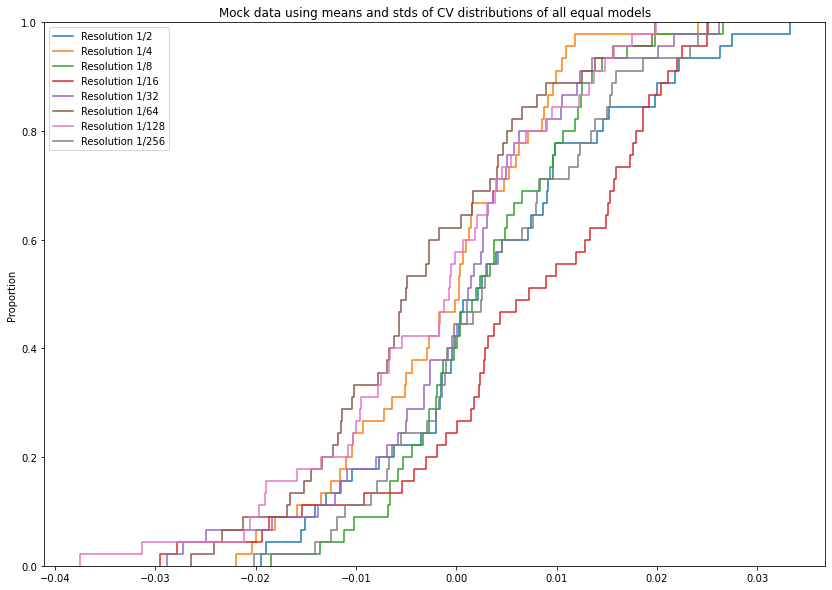

In [98]:
sns.ecdfplot(divs_cont_equal_2,label='Resolution 1/2')
sns.ecdfplot(divs_cont_equal_4,label='Resolution 1/4')
sns.ecdfplot(divs_cont_equal_8,label='Resolution 1/8')
sns.ecdfplot(divs_cont_equal_16,label='Resolution 1/16')
sns.ecdfplot(divs_cont_equal_32,label='Resolution 1/32')
sns.ecdfplot(divs_cont_equal_64,label='Resolution 1/64')
sns.ecdfplot(divs_cont_equal_128,label='Resolution 1/128')
sns.ecdfplot(divs_cont_equal_256,label='Resolution 1/256')
plt.legend();
plt.title('Mock data using means and stds of CV distributions of all equal models');

Lets do it for the continuous model, only one resolution.

In [99]:
m_1 = np.mean(df.loc['continuous',8]['CV'][1].values)
m_2 = np.mean(df.loc['continuous',8]['CV'][2].values)
m_3 = np.mean(df.loc['continuous',8]['CV'][3].values)
m_4 = np.mean(df.loc['continuous',8]['CV'][4].values)
m_5 = np.mean(df.loc['continuous',8]['CV'][5].values)
m_6 = np.mean(df.loc['continuous',8]['CV'][6].values)
m_7 = np.mean(df.loc['continuous',8]['CV'][7].values)
m_8 = np.mean(df.loc['continuous',8]['CV'][8].values)
m_9 = np.mean(df.loc['continuous',8]['CV'][9].values)
m_10 = np.mean(df.loc['continuous',8]['CV'][10].values)


s_1 = np.std(df.loc['continuous',8]['CV'][1].values)
s_2 = np.std(df.loc['continuous',8]['CV'][2].values)
s_3 = np.std(df.loc['continuous',8]['CV'][3].values)
s_4 = np.std(df.loc['continuous',8]['CV'][4].values)
s_5 = np.std(df.loc['continuous',8]['CV'][5].values)
s_6 = np.std(df.loc['continuous',8]['CV'][6].values)
s_7 = np.std(df.loc['continuous',8]['CV'][7].values)
s_8 = np.std(df.loc['continuous',8]['CV'][8].values)
s_9 = np.std(df.loc['continuous',8]['CV'][9].values)
s_10 = np.std(df.loc['continuous',8]['CV'][10].values)

y_1 = np.random.normal(m_1, s_1, 10000)
y_2 = np.random.normal(m_2, s_2, 10000)
y_3 = np.random.normal(m_3, s_3, 10000)
y_4 = np.random.normal(m_4, s_4, 10000)
y_5 = np.random.normal(m_5, s_5, 10000)
y_6 = np.random.normal(m_6, s_6, 10000)
y_7 = np.random.normal(m_7, s_7, 10000)
y_8 = np.random.normal(m_8, s_8, 10000)
y_9 = np.random.normal(m_9, s_9, 10000)
y_10 = np.random.normal(m_10, s_10, 10000)

y = [y_1,y_2,y_3,y_4,y_5,y_6,y_7,y_8,y_9,y_10]

divs_cont_cont_8 = []
for i in range(0,10):
        for j in range(0,i):
            kl = cumulative_kl(y[i],y[j])
            divs_cont_cont_8.append(kl)

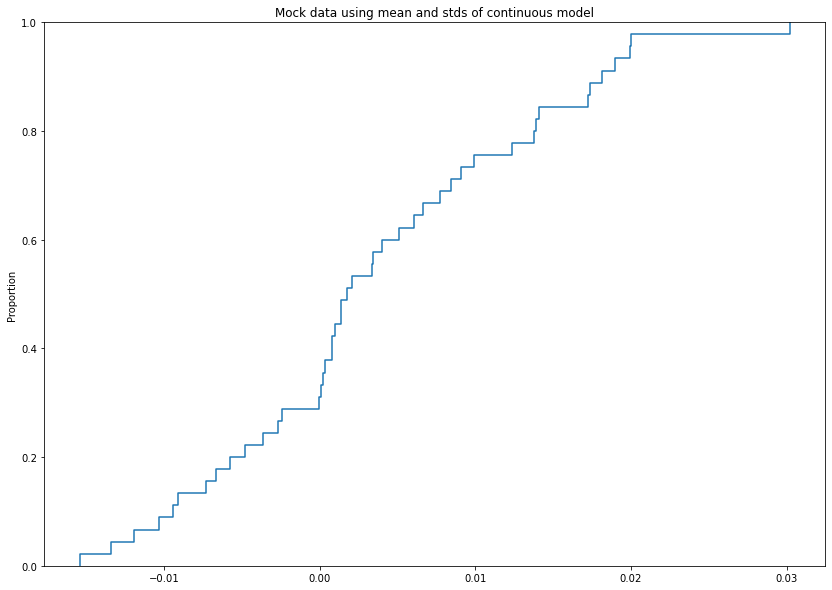

In [100]:
sns.ecdfplot(divs_cont_cont_8,label='Resolution 1/8')
plt.title('Mock data using mean and stds of continuous model');

Lets plot them all together and see an overview.

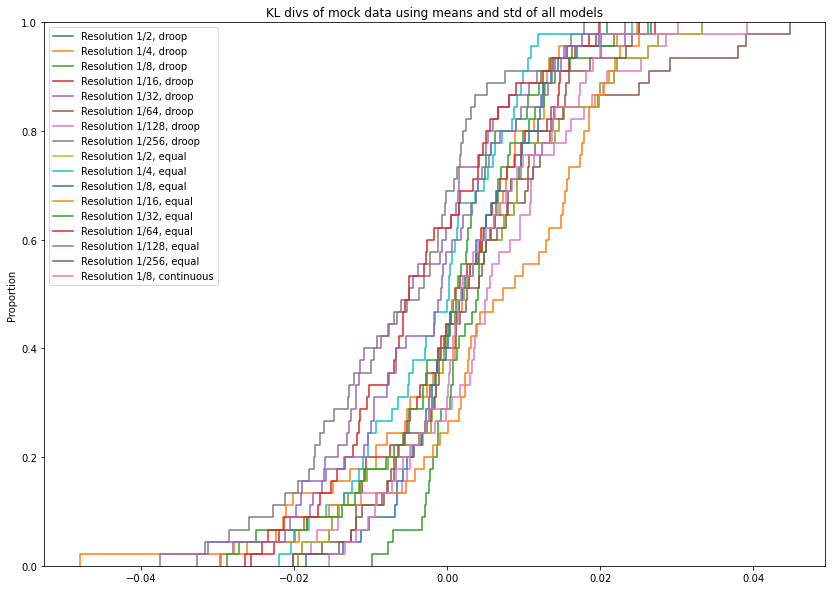

In [102]:
sns.ecdfplot(divs_cont_droop_2,label='Resolution 1/2, droop')
sns.ecdfplot(divs_cont_droop_4,label='Resolution 1/4, droop')
sns.ecdfplot(divs_cont_droop_8,label='Resolution 1/8, droop')
sns.ecdfplot(divs_cont_droop_16,label='Resolution 1/16, droop')
sns.ecdfplot(divs_cont_droop_32,label='Resolution 1/32, droop')
sns.ecdfplot(divs_cont_droop_64,label='Resolution 1/64, droop')
sns.ecdfplot(divs_cont_droop_128,label='Resolution 1/128, droop')
sns.ecdfplot(divs_cont_droop_256,label='Resolution 1/256, droop')
sns.ecdfplot(divs_cont_equal_2,label='Resolution 1/2, equal')
sns.ecdfplot(divs_cont_equal_4,label='Resolution 1/4, equal')
sns.ecdfplot(divs_cont_equal_8,label='Resolution 1/8, equal')
sns.ecdfplot(divs_cont_equal_16,label='Resolution 1/16, equal')
sns.ecdfplot(divs_cont_equal_32,label='Resolution 1/32, equal')
sns.ecdfplot(divs_cont_equal_64,label='Resolution 1/64, equal')
sns.ecdfplot(divs_cont_equal_128,label='Resolution 1/128, equal')
sns.ecdfplot(divs_cont_equal_256,label='Resolution 1/256, equal')
sns.ecdfplot(divs_cont_cont_8,label='Resolution 1/8, continuous')
plt.legend();
plt.title('KL divs of mock data using means and std of all models');

We see that the KL divergence for simulaitons from the same "model" range from approximately -0.04 to 0.04.

Let us try to see what happens when he have the same standard deviation but different means.

In [139]:
x_1 = np.random.normal(1, 1, 10000)
x_2 = np.random.normal(2, 1, 10000)
x_3 = np.random.normal(3, 1, 10000)
x_4 = np.random.normal(4, 1, 10000)
x_5 = np.random.normal(5, 1, 10000)
x_6 = np.random.normal(6, 1, 10000)
x_7 = np.random.normal(7, 1, 10000)
x_8 = np.random.normal(8, 1, 10000)
x_9 = np.random.normal(9, 1, 10000)
x_10 = np.random.normal(10, 1, 10000)

x = [x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10]

divs_means = []
for i in range(0,10):
        for j in range(0,i):
            kl = cumulative_kl(x[i],x[j])
            divs_means.append(kl)

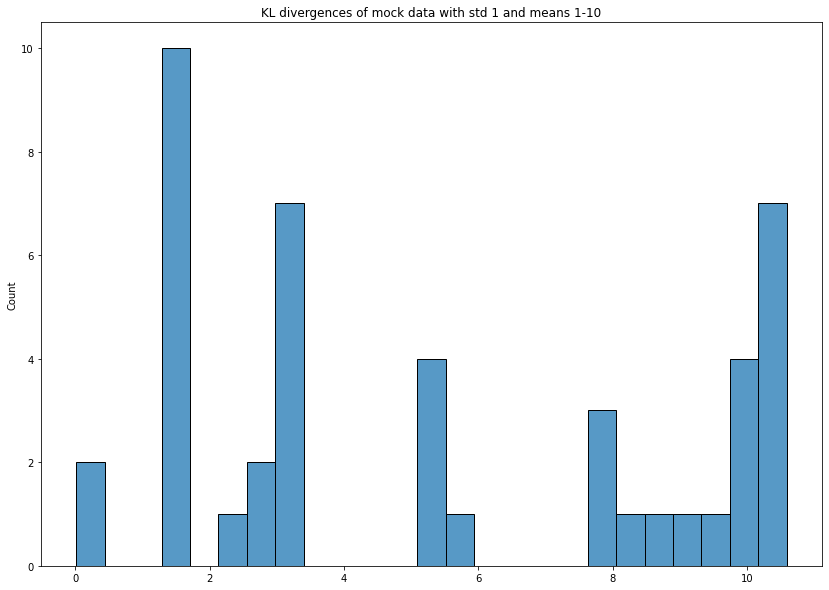

In [144]:
sns.histplot(divs_means,bins=25)
plt.title('KL divergences of mock data with std 1 and means 1-10');

We actually get quite high divergences when the mean changes, we get KL divs as high as 10, in contrast to the previous data where we got between -0.4 and 0.4. Lets see what happens when mean stays constant but the standard deviations change.

In [105]:
x_1 = np.random.normal(0, 1, 10000)
x_2 = np.random.normal(0, 2, 10000)
x_3 = np.random.normal(0, 3, 10000)
x_4 = np.random.normal(0, 4, 10000)
x_5 = np.random.normal(0, 5, 10000)
x_6 = np.random.normal(0, 0.5, 10000)
x_7 = np.random.normal(0, 0.25, 10000)
x_8 = np.random.normal(0, 0.1, 10000)
x_9 = np.random.normal(0, 8, 10000)
x_10 = np.random.normal(0, 10, 10000)

x = [x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10]

divs_stds = []
for i in range(0,10):
        for j in range(0,i):
            kl = cumulative_kl(x[i],x[j])
            divs_stds.append(kl)

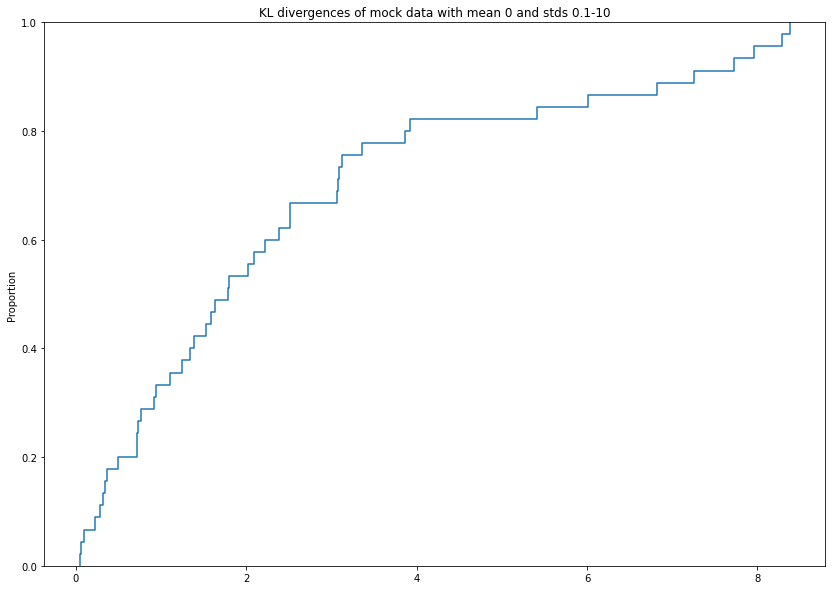

In [106]:
sns.ecdfplot(divs_stds)
plt.title('KL divergences of mock data with mean 0 and stds 0.1-10');

Again quite high KL divs when the std changes. A little less than when means where different.

What happens when standard deviation changes by a half, one, two, or five times.

In [107]:
x_1 = np.random.normal(0, 1, 10000)
x_2 = np.random.normal(0, 1.5, 10000)
x_3 = np.random.normal(0, 2, 10000)
x_4 = np.random.normal(0, 3, 10000)
x_5 = np.random.normal(0, 6, 10000)


x = [x_1,x_2,x_3,x_4,x_5]

divs_x = []
for i in range(0,5):
        for j in range(0,i):
            kl = cumulative_kl(x[i],x[j])
            divs_x.append(kl)
            
y = np.random.normal(0,1,size=(5,10000))

divs_y = []
for i in range(0,5):
        for j in range(0,i):
            kl = cumulative_kl(y[i],y[j])
            divs_y.append(kl)

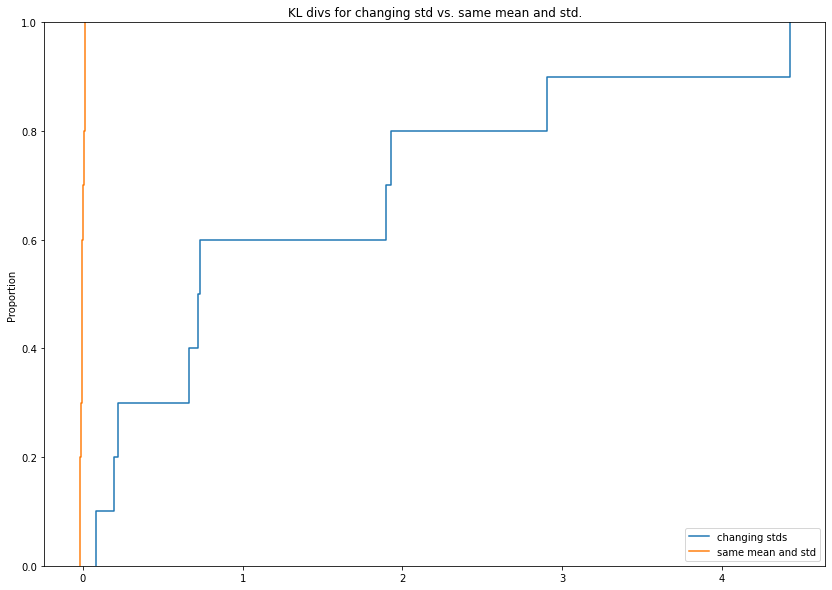

In [108]:
sns.ecdfplot(divs_x,label='changing stds')
sns.ecdfplot(divs_y,label='same mean and std')
plt.legend();
plt.title('KL divs for changing std vs. same mean and std.');

A lot happens, much higher values for chaning std values. Lets try to calculate KL div between different distributions, and see how much it changes when the one distribution has std 0.5 more, then 2 more, then...

In [109]:
x = np.random.normal(0,1,size=(10,10000))
y = np.random.normal(0,1.5,size=(10,10000))

divs_x = []
for i in range(0,10):
        for j in range(0,i):
            kl = cumulative_kl(x[i],x[j])
            divs_x.append(kl)
divs_y = []
for i in range(0,10):
        for j in range(0,i):
            kl = cumulative_kl(y[i],y[j])
            divs_y.append(kl)
            
divs_x_y = []
comb = list(itertools.product(x, y))
for i in range(0,len(comb)):
        kl = cumulative_kl(comb[i][0],comb[i][1],fraction=0.05)
        divs_x_y.append(kl)

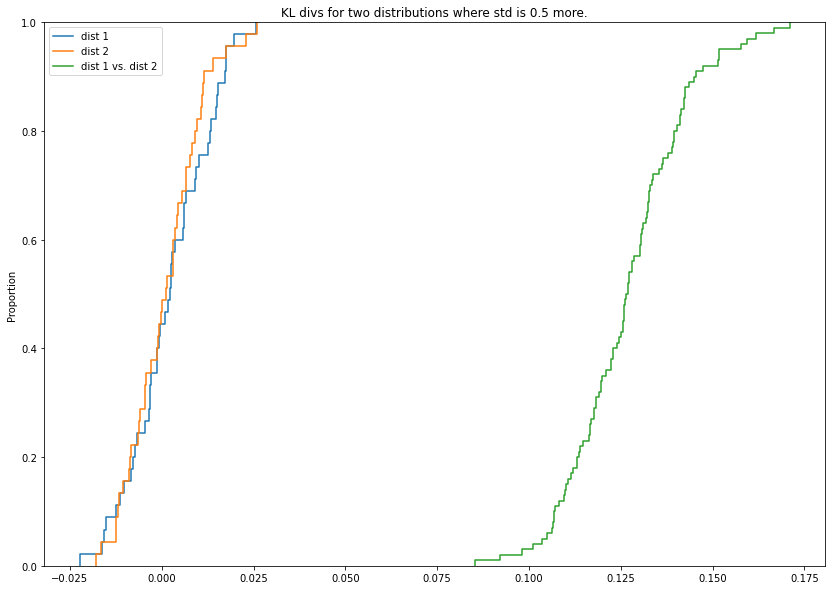

In [110]:
sns.ecdfplot(divs_x,label='dist 1')
sns.ecdfplot(divs_y,label='dist 2')
sns.ecdfplot(divs_x_y,label='dist 1 vs. dist 2')
plt.legend();
plt.title('KL divs for two distributions where std is 0.5 more.');

Even when the std is only 0.5 more in one distribution, the KL divs for the two distributions against each other is quite different from the KL divs of simulations from the same model against each other.

In [111]:
x = np.random.normal(0,1,size=(10,10000))
y = np.random.normal(0,2,size=(10,10000))

divs_x = []
for i in range(0,10):
        for j in range(0,i):
            kl = cumulative_kl(x[i],x[j])
            divs_x.append(kl)
divs_y = []
for i in range(0,10):
        for j in range(0,i):
            kl = cumulative_kl(y[i],y[j])
            divs_y.append(kl)
            
divs_x_y = []
comb = list(itertools.product(x, y))
for i in range(0,len(comb)):
        kl = cumulative_kl(comb[i][0],comb[i][1],fraction=0.05)
        divs_x_y.append(kl)

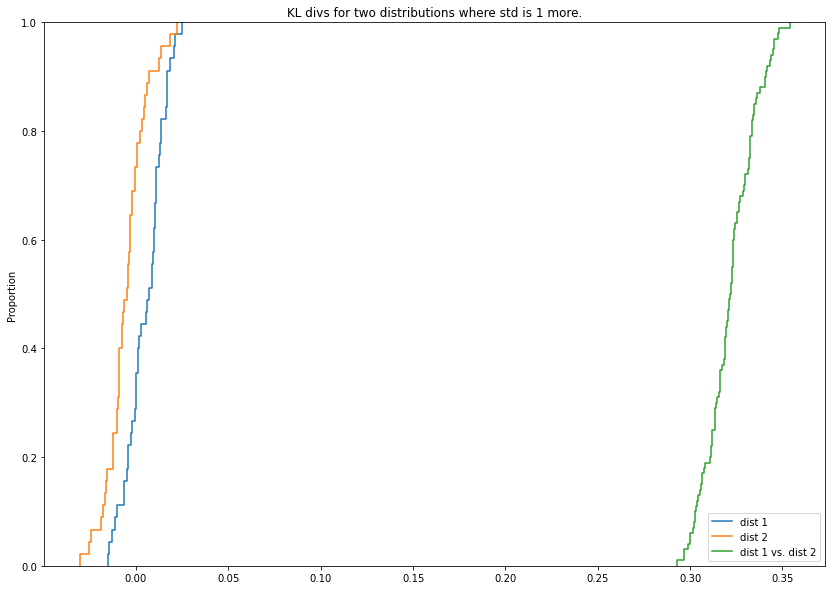

In [112]:
sns.ecdfplot(divs_x,label='dist 1')
sns.ecdfplot(divs_y,label='dist 2')
sns.ecdfplot(divs_x_y,label='dist 1 vs. dist 2')
plt.legend();
plt.title('KL divs for two distributions where std is 1 more.');

See that when the std was 1 more, the KL divs increased three times more (0.175 to 0.35)

In [113]:
x = np.random.normal(0,1,size=(10,10000))
y = np.random.normal(0,3,size=(10,10000))

divs_x = []
for i in range(0,10):
        for j in range(0,i):
            kl = cumulative_kl(x[i],x[j])
            divs_x.append(kl)
divs_y = []
for i in range(0,10):
        for j in range(0,i):
            kl = cumulative_kl(y[i],y[j])
            divs_y.append(kl)
            
divs_x_y = []
comb = list(itertools.product(x, y))
for i in range(0,len(comb)):
        kl = cumulative_kl(comb[i][0],comb[i][1],fraction=0.05)
        divs_x_y.append(kl)

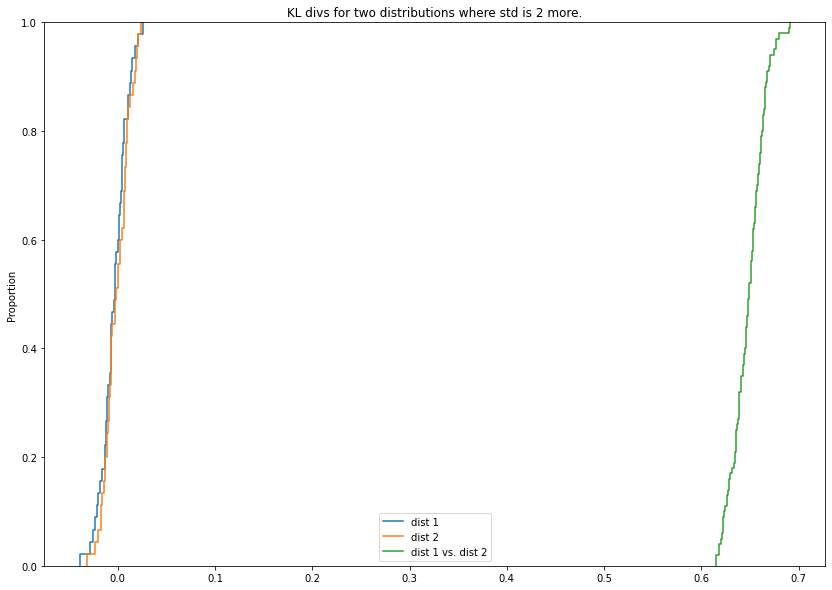

In [114]:
sns.ecdfplot(divs_x,label='dist 1')
sns.ecdfplot(divs_y,label='dist 2')
sns.ecdfplot(divs_x_y,label='dist 1 vs. dist 2')
plt.legend();
plt.title('KL divs for two distributions where std is 2 more.');

Always seems like the KL divs for the simulations from the same distributions are gathered around 0, while the KL divs for the two distributions against each other increases. Here where the std was 2 more for one distribtuion we get KL divs as high as 0.7, increased approx 2 times from when the std was 1 more for one distribution.

In [115]:
x = np.random.normal(0,1,size=(10,10000))
y = np.random.normal(0,6,size=(10,10000))

divs_x = []
for i in range(0,10):
        for j in range(0,i):
            kl = cumulative_kl(x[i],x[j])
            divs_x.append(kl)
divs_y = []
for i in range(0,10):
        for j in range(0,i):
            kl = cumulative_kl(y[i],y[j])
            divs_y.append(kl)
            
divs_x_y = []
comb = list(itertools.product(x, y))
for i in range(0,len(comb)):
        kl = cumulative_kl(comb[i][0],comb[i][1],fraction=0.05)
        divs_x_y.append(kl)

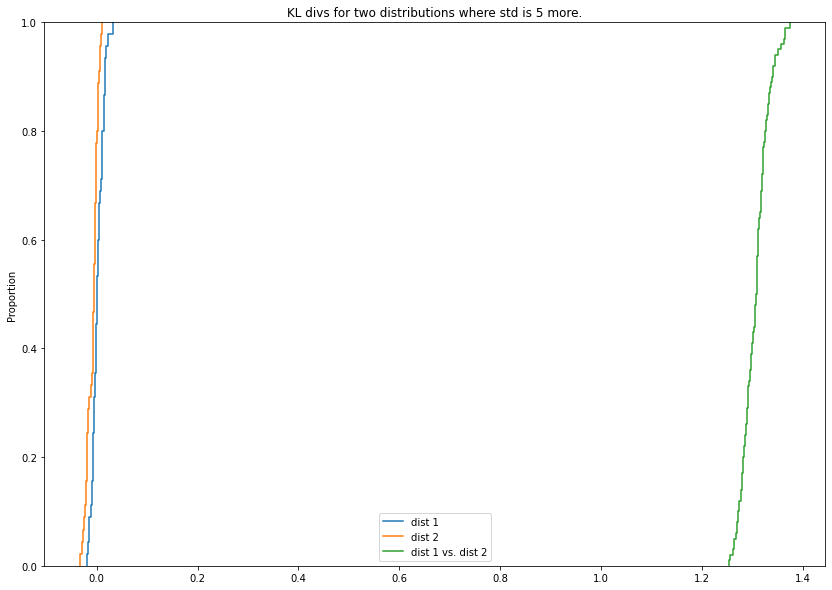

In [116]:
sns.ecdfplot(divs_x,label='dist 1')
sns.ecdfplot(divs_y,label='dist 2')
sns.ecdfplot(divs_x_y,label='dist 1 vs. dist 2')
plt.legend();
plt.title('KL divs for two distributions where std is 5 more.');

Now the KL divs for the two distributions against each other reaches 1.4, double the KL divs from when the std was 2 more for one distribution.

Lets try to get KL divs for two distributions against each other, first two we know are similar, then two that are less similar, and see what the KL divs show.

In [145]:
x = np.random.normal(0,1,size=(10,10000))
y = np.random.normal(0,1.5,size=(10,10000))
z = np.random.normal(0,6,size=(10,10000))

divs_x = []
for i in range(0,10):
        for j in range(0,i):
            kl = cumulative_kl(x[i],x[j])
            divs_x.append(kl)
divs_y = []
for i in range(0,10):
        for j in range(0,i):
            kl = cumulative_kl(y[i],y[j])
            divs_y.append(kl)
            
divs_z = []
for i in range(0,10):
        for j in range(0,i):
            kl = cumulative_kl(z[i],z[j])
            divs_z.append(kl)   
            
divs_x_y = []
comb = list(itertools.product(x, y))
for i in range(0,len(comb)):
        kl = cumulative_kl(comb[i][0],comb[i][1],fraction=0.05)
        divs_x_y.append(kl)

divs_x_z = []
comb = list(itertools.product(x, z))
for i in range(0,len(comb)):
        kl = cumulative_kl(comb[i][0],comb[i][1],fraction=0.05)
        divs_x_z.append(kl)

In [146]:
from scipy import stats

In [150]:
np.mean(divs_x)

1.00126424181466

In [151]:
np.std(divs_x)

0.013186249366053497

In [152]:
np.median(divs_x)

1.0005593100154246

In [153]:
np.mean(divs_x_y)

1.1252036030598263

In [154]:
np.std(divs_x_y)

0.016617740219440437

In [155]:
np.median(divs_x_y)

1.1267272254277798

In [156]:
np.mean(divs_x_z)

2.294680640378372

In [157]:
np.std(divs_x_z)

0.01790623893496014

In [158]:
np.median(divs_x_z)

2.291408725744837

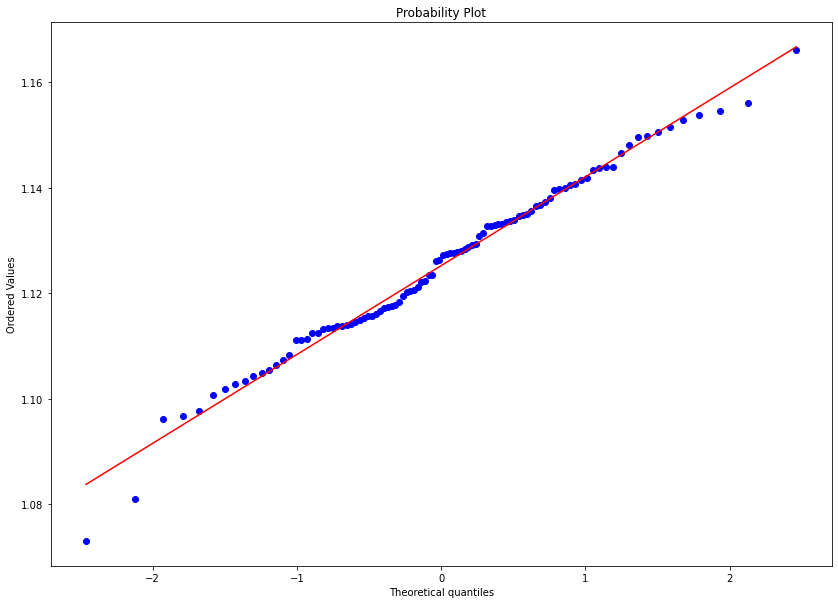

In [149]:
stats.probplot(divs_x_y,plot=plt);

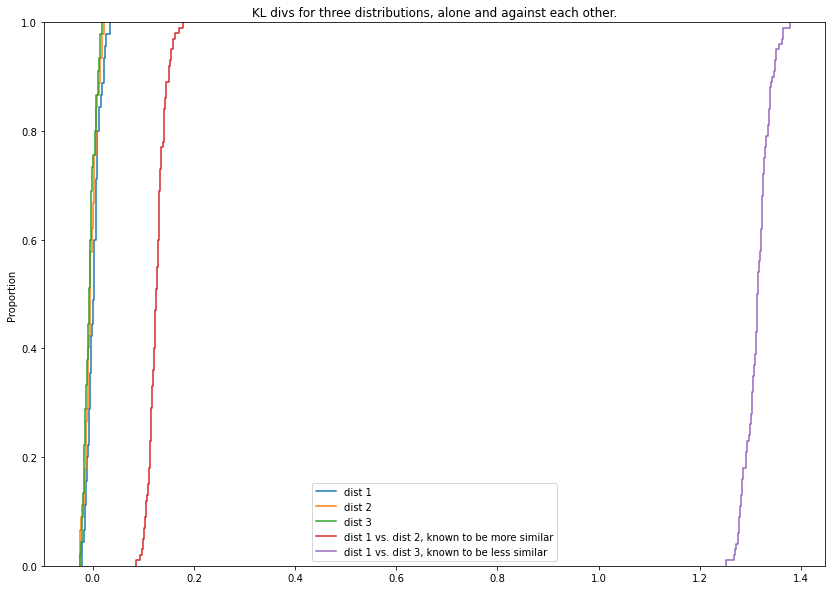

In [118]:
sns.ecdfplot(divs_x,label='dist 1')
sns.ecdfplot(divs_y,label='dist 2')
sns.ecdfplot(divs_z,label='dist 3')

sns.ecdfplot(divs_x_y,label='dist 1 vs. dist 2, known to be more similar')
sns.ecdfplot(divs_x_z, label='dist 1 vs. dist 3, known to be less similar')
plt.legend();
plt.title('KL divs for three distributions, alone and against each other.');

The KL divs for simulations from the same dist against each other all lie around 0. See that the KL divs for the two distributions against each other that are more similar lie closer to 0 than the two less similar. Lets try when the less similar distribution is not that extreme.

In [119]:
x = np.random.normal(0,1,size=(10,10000))
y = np.random.normal(0,1.5,size=(10,10000))
z = np.random.normal(0,2,size=(10,10000))

divs_x = []
for i in range(0,10):
        for j in range(0,i):
            kl = cumulative_kl(x[i],x[j])
            divs_x.append(kl)
divs_y = []
for i in range(0,10):
        for j in range(0,i):
            kl = cumulative_kl(y[i],y[j])
            divs_y.append(kl)
            
divs_z = []
for i in range(0,10):
        for j in range(0,i):
            kl = cumulative_kl(z[i],z[j])
            divs_z.append(kl)   
            
divs_x_y = []
comb = list(itertools.product(x, y))
for i in range(0,len(comb)):
        kl = cumulative_kl(comb[i][0],comb[i][1],fraction=0.05)
        divs_x_y.append(kl)

divs_x_z = []
comb = list(itertools.product(x, z))
for i in range(0,len(comb)):
        kl = cumulative_kl(comb[i][0],comb[i][1],fraction=0.05)
        divs_x_z.append(kl)

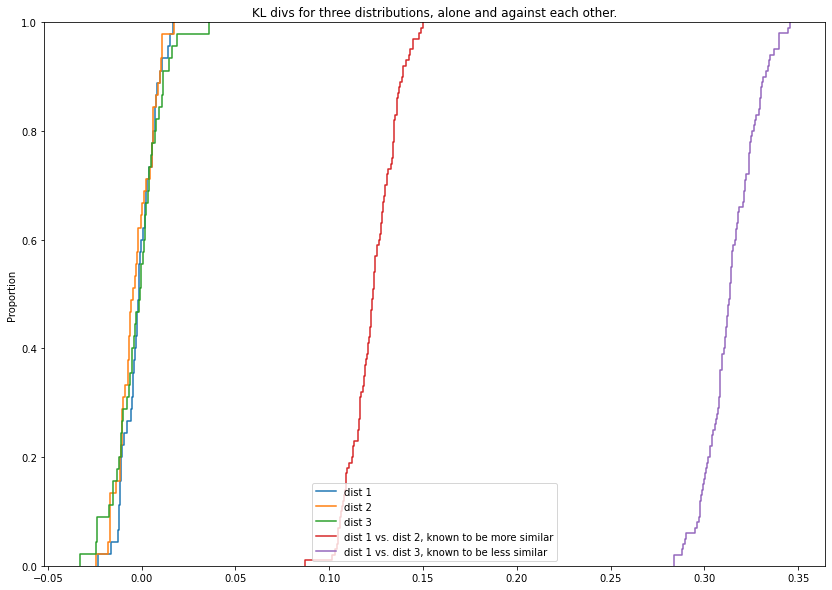

In [120]:
sns.ecdfplot(divs_x,label='dist 1')
sns.ecdfplot(divs_y,label='dist 2')
sns.ecdfplot(divs_z,label='dist 3')

sns.ecdfplot(divs_x_y,label='dist 1 vs. dist 2, known to be more similar')
sns.ecdfplot(divs_x_z, label='dist 1 vs. dist 3, known to be less similar')
plt.legend();
plt.title('KL divs for three distributions, alone and against each other.');

Again, the two distributions that are more similar have curve closer to zero than the two less similar. But when looking at the three KL curves for simulations from same model, it actually cannot be said by them alone that one distribution is closer than the other.


## Measurement without -1

According to the article, the estimator will be closer to zero for more similar models. Maybe we should just use their estimator (without the -1) and then decide on models being more similar if their KL divergences are closer to zero. Lets use that version for some distributions under:

In [121]:
def ecdf(x,tot_min,tot_max):
    x = np.sort(list(x)+[tot_min,tot_max])
    u, c = np.unique(x, return_counts=True)
    n = len(x)
    y = (np.cumsum(c) - 0.5)/n
    def interpolate_(x_):
        yinterp = np.interp(x_, u, y, left=tot_min, right=tot_max)
        return yinterp
    return interpolate_

def cumulative_kl(x,y,fraction=0.5): 
    dx = np.diff(np.sort(np.unique(x)))
    dy = np.diff(np.sort(np.unique(y)))
    ex = np.min(dx)
    ey = np.min(dy)
    e = np.min([ex,ey])*fraction
    n = len(x)
    # total max
    max_x = max(x)
    max_y = max(y)
    tot_max = max(max_x,max_y)
    # total min
    min_x = min(x)
    min_y = min(y)
    tot_min = min(min_x, min_y)
    # send tot_max and tot_min to interpolation limits
    P = ecdf(x,tot_min,tot_max)
    Q = ecdf(y,tot_min,tot_max)
    
    # machine epsilon
    machine_eps = np.finfo('float').eps
    summ = 0
    for i in range(0,len(x)):
        if(abs(Q(x[i])-Q(x[i]-e))>3*machine_eps):
            summ += np.log((P(x[i]) - P(x[i]-e))/(Q(x[i]) - Q(x[i]-e)))
    # 1/n*summ -1 converges to KL divergence    
    KL = (1./n)*summ
    #KL = (1./n)*np.sum(np.log((P(x) - P(x-e))/(Q(x) - Q(x-e)))) - 1
    return KL

In [122]:
x = np.random.normal(0,1,size=(10,10000))
y = np.random.normal(0,1.5,size=(10,10000))
z = np.random.normal(0,2,size=(10,10000))

divs_x = []
for i in range(0,10):
        for j in range(0,i):
            kl = cumulative_kl(x[i],x[j])
            divs_x.append(kl)
divs_y = []
for i in range(0,10):
        for j in range(0,i):
            kl = cumulative_kl(y[i],y[j])
            divs_y.append(kl)
            
divs_z = []
for i in range(0,10):
        for j in range(0,i):
            kl = cumulative_kl(z[i],z[j])
            divs_z.append(kl)   
            
divs_x_y = []
comb = list(itertools.product(x, y))
for i in range(0,len(comb)):
        kl = cumulative_kl(comb[i][0],comb[i][1],fraction=0.05)
        divs_x_y.append(kl)

divs_x_z = []
comb = list(itertools.product(x, z))
for i in range(0,len(comb)):
        kl = cumulative_kl(comb[i][0],comb[i][1],fraction=0.05)
        divs_x_z.append(kl)

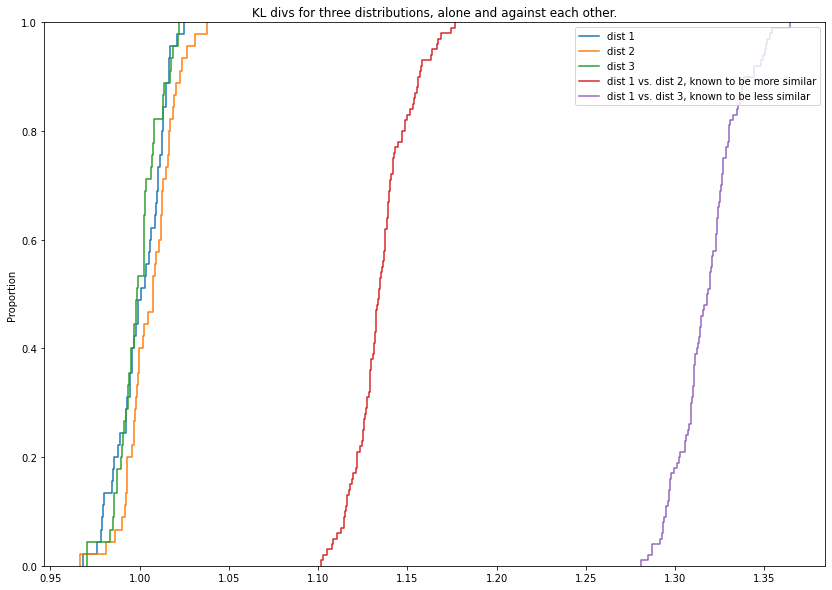

In [123]:
sns.ecdfplot(divs_x,label='dist 1')
sns.ecdfplot(divs_y,label='dist 2')
sns.ecdfplot(divs_z,label='dist 3')

sns.ecdfplot(divs_x_y,label='dist 1 vs. dist 2, known to be more similar')
sns.ecdfplot(divs_x_z, label='dist 1 vs. dist 3, known to be less similar')
plt.legend();
plt.title('KL divs for three distributions, alone and against each other.');

Same relationship as before but now with other values. Let us try to look at some CV distributions and see if difference between the models are visible. More similar if the KL divs for two models against each other are closer to 0.

In [125]:
# if we want to compare all distributions from two different models.
def kl_two(value_list_1,value_list_2):
    # send inn value list on the form df.loc['droop',8]['CV']
    t1 = []
    for i in range(1,11):
        l = value_list_1[i].values.tolist()
        t1.append(l)

    t2 = []
    for i in range(1,11):
        l = value_list_2[i].values.tolist()
        t2.append(l)
    comb = list(itertools.product(t1, t2))
    kls = []
    for i in range(0,len(comb)):
        kl = cumulative_kl(comb[i][0],comb[i][1],fraction=0.05)
        kls.append(kl)
    return kls

def kl(cv_list_exc):
    divs_exc = []
    for i in range(1,11):
        for j in range(1,i):
            kl_exc = cumulative_kl(cv_list_exc[i],cv_list_exc[j],fraction=0.05)
            divs_exc.append(kl_exc)
    return divs_exc

In [127]:
cont = df.loc['continuous',8]['CV']

In [128]:
# resolution 1/2
k1 = kl_two(df.loc['equal',2]['CV'],df.loc['droop',2]['CV']) # equal vs droop
k2 = kl_two(df.loc['equal',2]['CV'],cont) # equal vs continuous
k3 = kl_two(cont,df.loc['droop',2]['CV']) # droop vs continuous

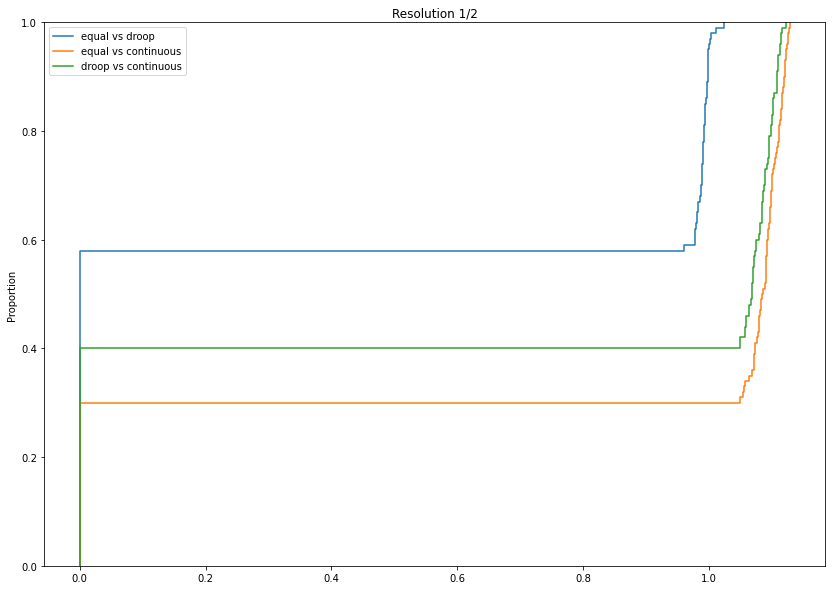

In [129]:
sns.ecdfplot(k1,label='equal vs droop')
sns.ecdfplot(k2,label='equal vs continuous')
sns.ecdfplot(k3,label='droop vs continuous')
plt.title('Resolution 1/2');
plt.legend();

equal vs. droop closer to zero, these two models are more similar. 

In [130]:
# resolution 1/4
k1 = kl_two(df.loc['equal',4]['CV'],df.loc['droop',4]['CV']) # equal vs droop
k2 = kl_two(df.loc['equal',4]['CV'],cont) # equal vs continuous
k3 = kl_two(cont,df.loc['droop',4]['CV']) # droop vs continuous

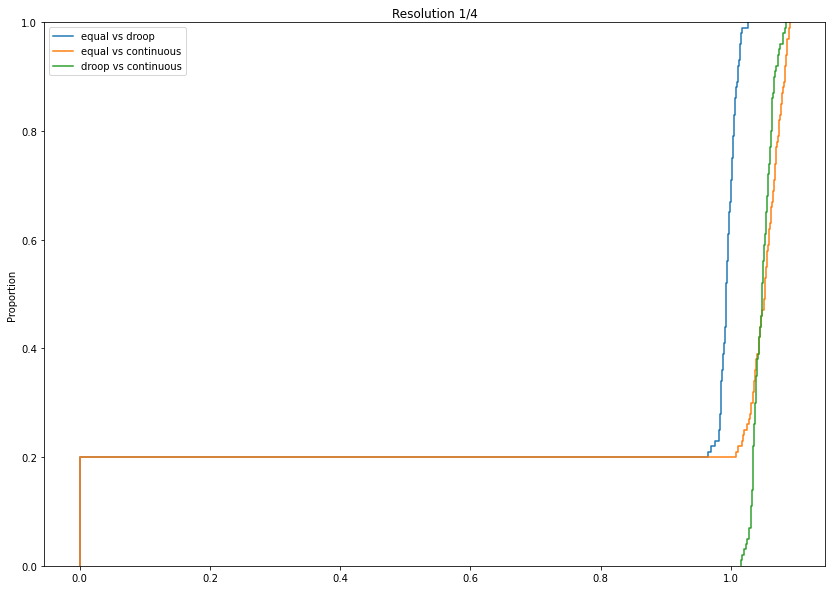

In [131]:
sns.ecdfplot(k1,label='equal vs droop')
sns.ecdfplot(k2,label='equal vs continuous')
sns.ecdfplot(k3,label='droop vs continuous')
plt.title('Resolution 1/4');
plt.legend();

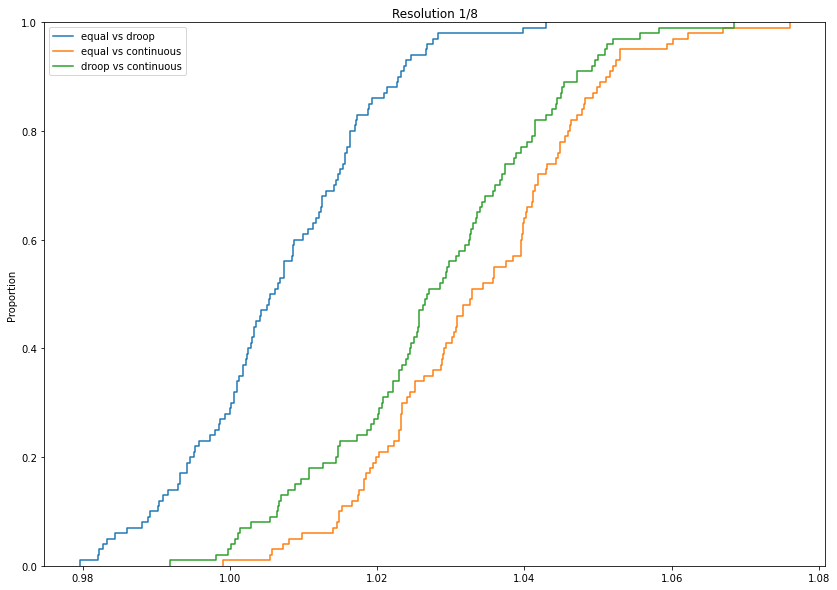

In [132]:
# resolution 1/8
k1 = kl_two(df.loc['equal',8]['CV'],df.loc['droop',8]['CV']) # equal vs droop
k2 = kl_two(df.loc['equal',8]['CV'],cont) # equal vs continuous
k3 = kl_two(cont,df.loc['droop',8]['CV']) # droop vs continuous

sns.ecdfplot(k1,label='equal vs droop')
sns.ecdfplot(k2,label='equal vs continuous')
sns.ecdfplot(k3,label='droop vs continuous')
plt.title('Resolution 1/8');
plt.legend();

As the KL divs for equal vs. droop are closest to zero these two models are more similar. Then from the other two curves it seems like droop model is more similar to continuous model than the equal one. This because KL divs of droop vs. continuous is closer to zero than the KL divs of equal vs. continuous.

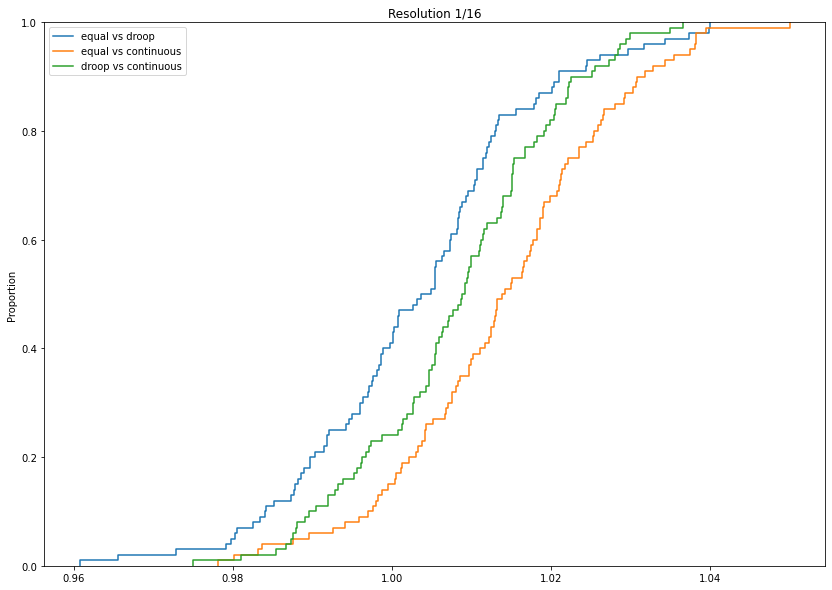

In [134]:
# resolution 1/16
k1 = kl_two(df.loc['equal',16]['CV'],df.loc['droop',16]['CV']) # equal vs droop
k2 = kl_two(df.loc['equal',16]['CV'],cont) # equal vs continuous
k3 = kl_two(cont,df.loc['droop',16]['CV']) # droop vs continuous

sns.ecdfplot(k1,label='equal vs droop')
sns.ecdfplot(k2,label='equal vs continuous')
sns.ecdfplot(k3,label='droop vs continuous')
plt.title('Resolution 1/16');
plt.legend();

Here it is not as clear as the curves are intertwining, but since droop vs. continuous for the most part is further to the left (closer to zero) this might indicate droop model being closer to continuous than the equal one.

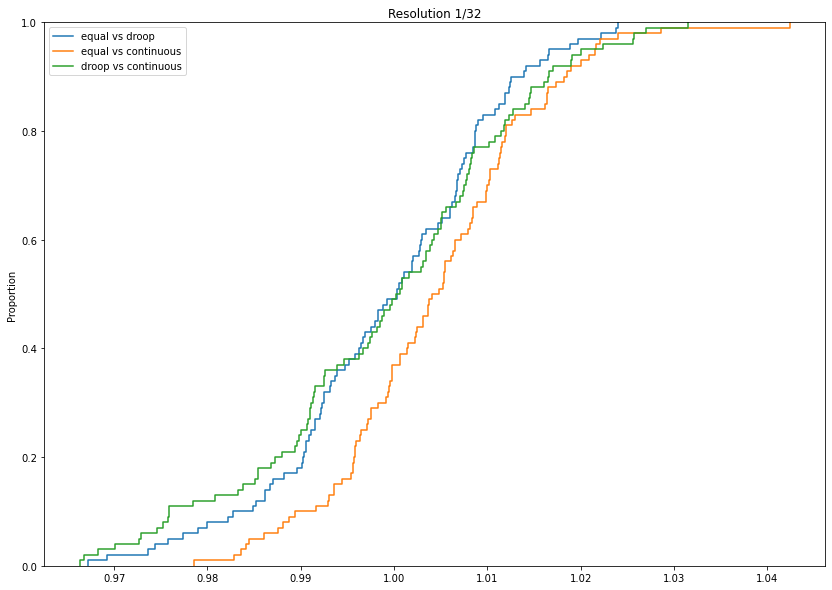

In [135]:
# resolution 1/32
k1 = kl_two(df.loc['equal',32]['CV'],df.loc['droop',32]['CV']) # equal vs droop
k2 = kl_two(df.loc['equal',32]['CV'],cont) # equal vs continuous
k3 = kl_two(cont,df.loc['droop',32]['CV']) # droop vs continuous

sns.ecdfplot(k1,label='equal vs droop')
sns.ecdfplot(k2,label='equal vs continuous')
sns.ecdfplot(k3,label='droop vs continuous')
plt.title('Resolution 1/32');
plt.legend();

Again it seems like droop model is closer to continuous as their kl divs lie closer to zero than equal vs cont, but the curves are intertwining so not a clear distinction.

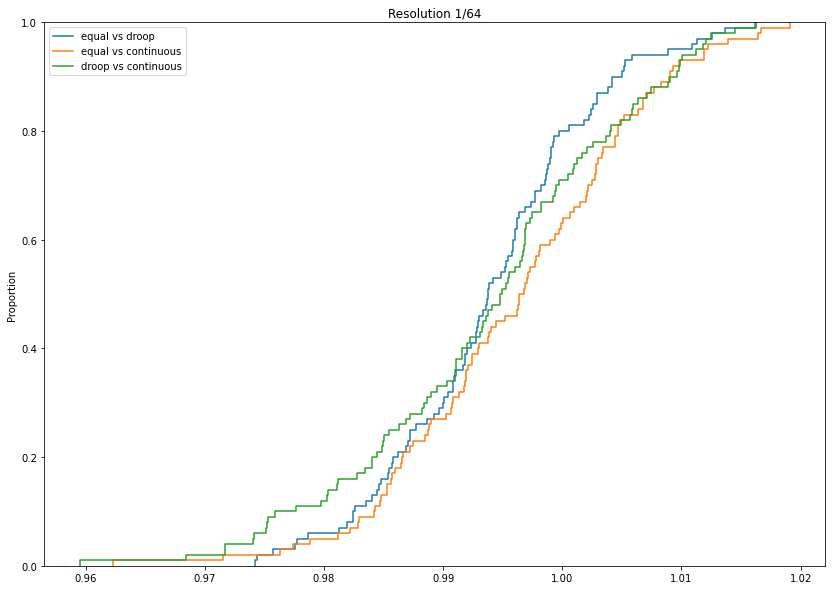

In [136]:
# resolution 1/64
k1 = kl_two(df.loc['equal',64]['CV'],df.loc['droop',64]['CV']) # equal vs droop
k2 = kl_two(df.loc['equal',64]['CV'],cont) # equal vs continuous
k3 = kl_two(cont,df.loc['droop',64]['CV']) # droop vs continuous

sns.ecdfplot(k1,label='equal vs droop')
sns.ecdfplot(k2,label='equal vs continuous')
sns.ecdfplot(k3,label='droop vs continuous')
plt.title('Resolution 1/64');
plt.legend();

droop slightly closer to continuous than equal.

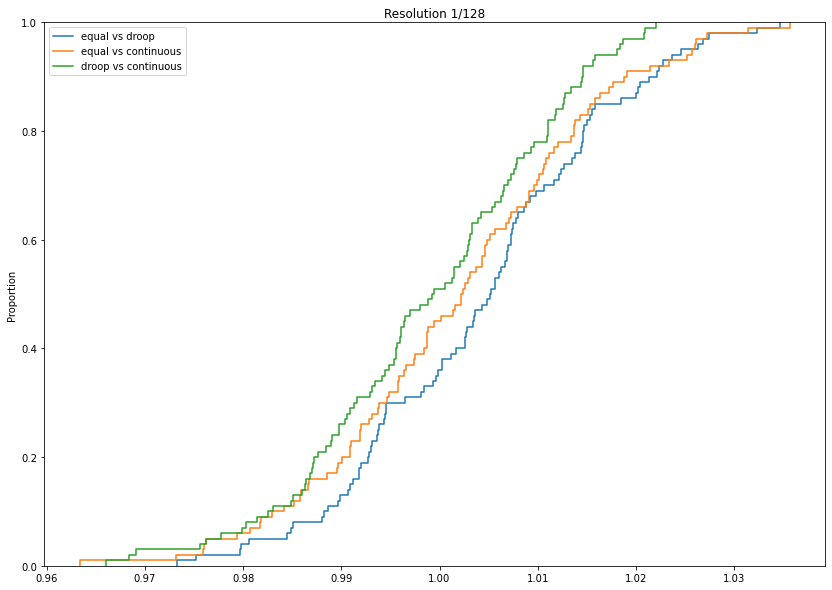

In [137]:
# resolution 1/128
k1 = kl_two(df.loc['equal',128]['CV'],df.loc['droop',128]['CV']) # equal vs droop
k2 = kl_two(df.loc['equal',128]['CV'],cont) # equal vs continuous
k3 = kl_two(cont,df.loc['droop',128]['CV']) # droop vs continuous

sns.ecdfplot(k1,label='equal vs droop')
sns.ecdfplot(k2,label='equal vs continuous')
sns.ecdfplot(k3,label='droop vs continuous')
plt.title('Resolution 1/128');
plt.legend();

Again droop vs. cont slighlty closer to zero, but barely as curves are intertwining.

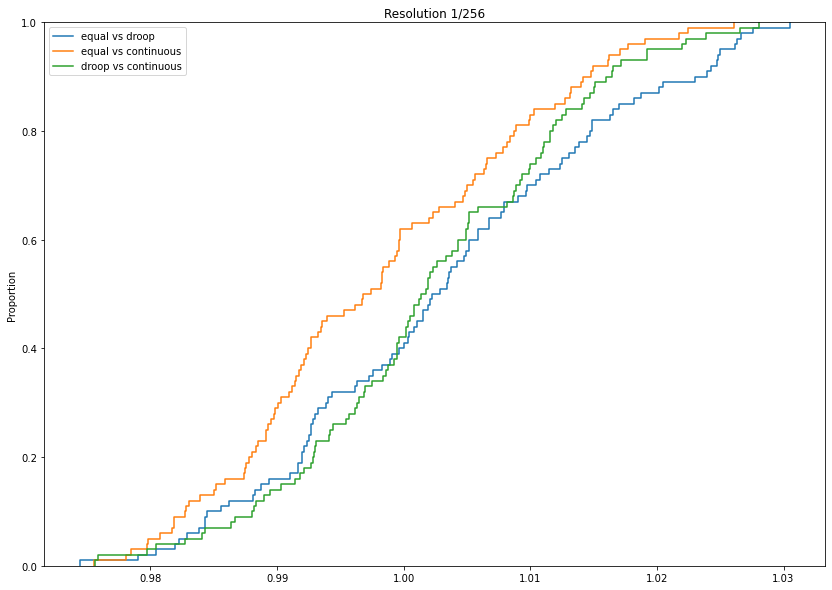

In [138]:
# resolution 1/256
k1 = kl_two(df.loc['equal',256]['CV'],df.loc['droop',256]['CV']) # equal vs droop
k2 = kl_two(df.loc['equal',256]['CV'],cont) # equal vs continuous
k3 = kl_two(cont,df.loc['droop',256]['CV']) # droop vs continuous

sns.ecdfplot(k1,label='equal vs droop')
sns.ecdfplot(k2,label='equal vs continuous')
sns.ecdfplot(k3,label='droop vs continuous')
plt.title('Resolution 1/256');
plt.legend();

Now the equal vs. cont is closer to zero and hence the equal model is more similar to continuous in this case.

Seems like we cannot say one model is closer to continuous than the other as their KL divs change in being closer to zero and there is intertwining.

Lets look at how the mean and median of the KL divergences change as the means of the distributions change. 

In [164]:
def get_div(x):
    divs = []
    for i in range(0,10):
        for j in range(0,i):
            kl = cumulative_kl(x[i],x[j])
            divs.append(kl)
    return divs

def get_divs(x,y):
    divs = []
    comb = list(itertools.product(x, y))
    for i in range(0,len(comb)):
        kl = cumulative_kl(comb[i][0],comb[i][1],fraction=0.05)
        divs.append(kl)
    return divs



a = np.random.normal(0,1,size=(10,10000)) 
# the means of the kl divs for the cv distributions changed from 1 to 1.02, lets use this scale for our 
# alternating means
b = np.random.normal(0.001,1,size=(10,10000))
c = np.random.normal(0.002,1,size=(10,10000))
d = np.random.normal(0.003,1,size=(10,10000))
e = np.random.normal(0.004,1,size=(10,10000))
f = np.random.normal(0.005,1,size=(10,10000))
g = np.random.normal(0.006,1,size=(10,10000))
h = np.random.normal(0.007,1,size=(10,10000))
x = np.random.normal(0.008,1,size=(10,10000))
y = np.random.normal(0.009,1,size=(10,10000))
k = np.random.normal(0.01,1,size=(10,10000))
l = np.random.normal(0.011,1,size=(10,10000))
m = np.random.normal(0.012,1,size=(10,10000))
n = np.random.normal(0.013,1,size=(10,10000))
o = np.random.normal(0.014,1,size=(10,10000))
p = np.random.normal(0.015,1,size=(10,10000))
q = np.random.normal(0.016,1,size=(10,10000))
r = np.random.normal(0.017,1,size=(10,10000))
s = np.random.normal(0.018,1,size=(10,10000))
t = np.random.normal(0.019,1,size=(10,10000))
u = np.random.normal(0.02,1,size=(10,10000))



divs_a = get_div(a)
divs_a_b = get_divs(a,b)
divs_a_c = get_divs(a,c)
divs_a_d = get_divs(a,d)
divs_a_e = get_divs(a,e)
divs_a_f = get_divs(a,f)
divs_a_g = get_divs(a,g)
divs_a_h = get_divs(a,h)
divs_a_x = get_divs(a,x)
divs_a_y = get_divs(a,y)
divs_a_k = get_divs(a,k)
divs_a_l = get_divs(a,l)
divs_a_m = get_divs(a,m)
divs_a_n = get_divs(a,n)
divs_a_o = get_divs(a,o)
divs_a_p = get_divs(a,p)
divs_a_q = get_divs(a,q)
divs_a_r = get_divs(a,r)
divs_a_s = get_divs(a,s)
divs_a_t = get_divs(a,t)
divs_a_u = get_divs(a,u)


            
mean_a = np.mean(divs_a)
mean_a_b = np.mean(divs_a_b)
mean_a_c = np.mean(divs_a_c)
mean_a_d = np.mean(divs_a_d)
mean_a_e = np.mean(divs_a_e)
mean_a_f = np.mean(divs_a_f)
mean_a_g = np.mean(divs_a_g)
mean_a_h = np.mean(divs_a_h)
mean_a_x = np.mean(divs_a_x)
mean_a_y = np.mean(divs_a_y)
mean_a_k = np.mean(divs_a_k)
mean_a_l = np.mean(divs_a_l)
mean_a_m = np.mean(divs_a_m)
mean_a_n = np.mean(divs_a_n)
mean_a_o = np.mean(divs_a_o)
mean_a_p = np.mean(divs_a_p)
mean_a_q = np.mean(divs_a_q)
mean_a_r = np.mean(divs_a_r)
mean_a_s = np.mean(divs_a_s)
mean_a_t = np.mean(divs_a_t)
mean_a_u = np.mean(divs_a_u)

           
median_a = np.median(divs_a)
median_a_b = np.median(divs_a_b)
median_a_c = np.median(divs_a_c)
median_a_d = np.median(divs_a_d)
median_a_e = np.median(divs_a_e)
median_a_f = np.median(divs_a_f)
median_a_g = np.median(divs_a_g)
median_a_h = np.median(divs_a_h)
median_a_x = np.median(divs_a_x)
median_a_y = np.median(divs_a_y)
median_a_k = np.median(divs_a_k)
median_a_l = np.median(divs_a_l)
median_a_m = np.median(divs_a_m)
median_a_n = np.median(divs_a_n)
median_a_o = np.median(divs_a_o)
median_a_p = np.median(divs_a_p)
median_a_q = np.median(divs_a_q)
median_a_r = np.median(divs_a_r)
median_a_s = np.median(divs_a_s)
median_a_t = np.median(divs_a_t)
median_a_u = np.median(divs_a_u)

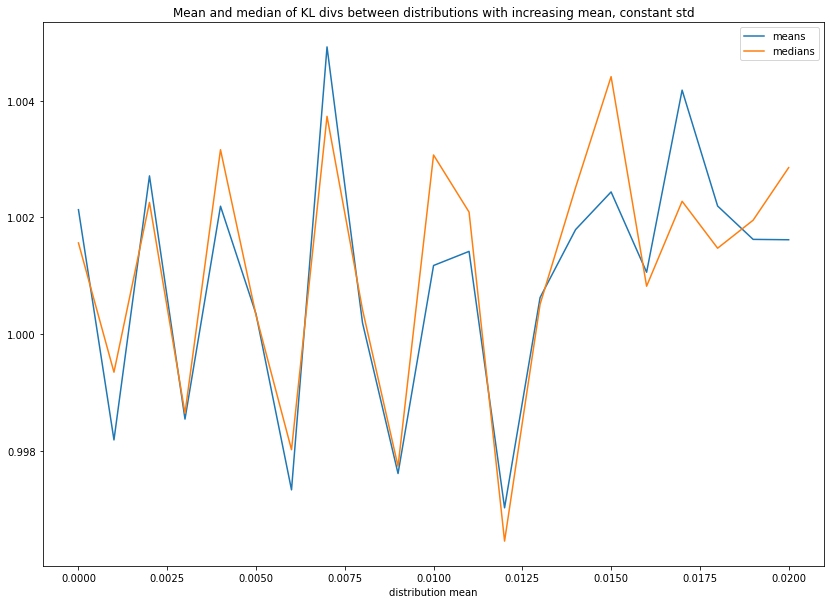

In [167]:
means = [mean_a,mean_a_b,mean_a_c,mean_a_d,mean_a_e,mean_a_f,mean_a_g,mean_a_h,mean_a_x,mean_a_y,mean_a_k,mean_a_l,
mean_a_m,mean_a_n,mean_a_o,mean_a_p,mean_a_q,mean_a_r,mean_a_s,mean_a_t,mean_a_u]

medians = [median_a,median_a_b,median_a_c,median_a_d,median_a_e,median_a_f,median_a_g,median_a_h,median_a_x,median_a_y,median_a_k,median_a_l,
median_a_m,median_a_n,median_a_o,median_a_p,median_a_q,median_a_r,median_a_s,median_a_t,median_a_u]

x_axis = np.linspace(0,0.02,num=21)

plt.plot(x_axis, means,label='means');
plt.plot(x_axis, medians,label='medians');
plt.title('Mean and median of KL divs between distributions with increasing mean, constant std');
plt.xlabel('distribution mean');
plt.legend();
plt.show();